In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


Loading the Datsets

In [2]:
df  = pd.read_csv("roadAccStats13-16.csv")
df1 = pd.read_csv("Details_of_road_accident_deaths_by_situation_state_2014.csv")
df2 = pd.read_csv("Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv")
df3 = pd.read_csv("accidents03-16.csv")
df4 = pd.read_csv("laneAccidents.csv")
df5 =  pd.read_csv("reasonOfAccident.csv")
df6 = pd.read_csv("typeOfVehicle.csv")
df7 = pd.read_csv("timeOfOccurence.csv")



Analyzing roadAccStats13-16 Dataset

In [3]:
df.tail(5)

,SI. No.,States/UTs,State/UT-Wise Total Number of Road Accidents during - 2013,State/UT-Wise Total Number of Road Accidents during - 2014,State/UT-Wise Total Number of Road Accidents during - 2015,State/UT-Wise Total Number of Road Accidents during - 2016,Share of States/UTs in Total Number of Road Accidents - 2013,Share of States/UTs in Total Number of Road Accidents - 2014,Share of States/UTs in Total Number of Road Accidents - 2015,Share of States/UTs in Total Number of Road Accidents - 2016,Total Number of Accidents Per Lakh Population - 2013,Total Number of Accidents Per Lakh Population - 2014,Total Number of Accidents Per Lakh Population - 2015,Total Number of Accidents Per Lakh Population - 2016,"Total Number of Road Accidents per 10,000 Vehicles - 2013","Total Number of Road Accidents per 10,000 Vehicles - 2014","Total Number of Road Accidents per 10,000 Vehicles - 2015","Total Number of Road Accidents per 10,000 Km of Roads - 2013","Total Number of Road Accidents per 10,000 Km of Roads - 2014","Total Number of Road Accidents per 10,000 Km of Roads - 2015"
32,33,Daman & Diu,59.0,39,70,71,0.0,0.0,0.0,0.0,20.1,12.8,22.1,21.5,6.4,4.1,7.0,3105.3,769.2,1341.0
33,34,Delhi,7566.0,8623,8085,7375,1.6,1.8,1.6,1.5,38.7,42.9,39.1,34.6,9.7,10.4,9.1,2364.7,2695.0,2521.3
34,35,Lakshadweep,1.0,1,3,1,0.0,0.0,0.0,0.0,1.3,1.3,3.8,1.2,0.9,0.8,2.1,48.3,48.1,140.2
35,36,Puducherry,1451.0,1111,1530,1766,0.3,0.2,0.3,0.4,95.9,70.6,94.1,105.8,20.7,14.8,19.1,5020.5,3678.9,4980.2
36,Total,Total,486476.0,489400,501423,480652,100.0,100.0,100.0,100.0,40.0,40.5,38.3,37.9,27.0,26.3,22.9,1129.8,1113.7,1051.3


1. **The percentage of road accidents during all the years.**

In [4]:
values = list(df.iloc[36,1:6])[1:5]
total=sum(list(df.iloc[36,1:6][1:5]))
columns=df.columns[2:6]
j=0
for i in values:
    percentage = round((i*100)/total,2)
    print(f"Percentage of Accidents in {columns[j]} is {percentage}")
    j+=1

Percentage of Accidents in State/UT-Wise Total Number of Road Accidents during - 2013 is 24.85
Percentage of Accidents in State/UT-Wise Total Number of Road Accidents during - 2014 is 25.0
Percentage of Accidents in State/UT-Wise Total Number of Road Accidents during - 2015 is 25.61
Percentage of Accidents in State/UT-Wise Total Number of Road Accidents during - 2016 is 24.55


Plotting a pie graph for showing the number of accidents happened every year from 2013 - 2016

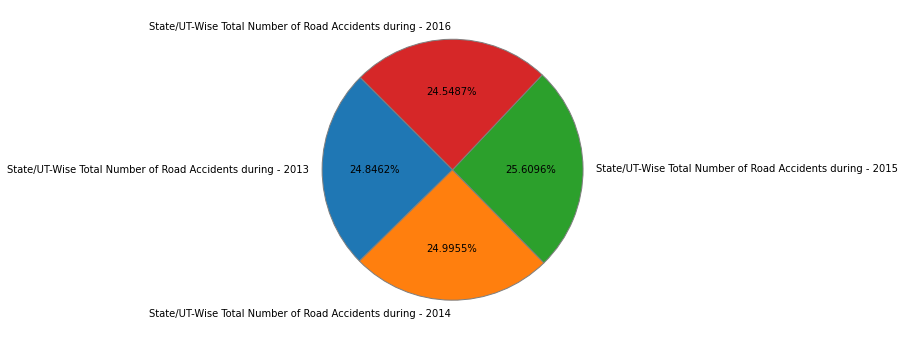

In [5]:
plt.figure(figsize=(6,6))
plt.pie(np.array(df.iloc[-1,2:6]),labels=df.columns[2:6],autopct='%2.4f%%',startangle = 135,wedgeprops= {"edgecolor":"grey",
                     'linewidth': 1,
                     'antialiased': True})
plt.show()

**2. Mean Accidents per 1L population for each year.**

In [6]:
columns=list(df.columns[10:14])
columns
df_ = df.head(36)


In [7]:
for i in columns:
    mean = df_[i].mean()
    print(f"Mean percentage of {i} is {round(mean,2)}")

Mean percentage of Total Number of Accidents Per Lakh Population - 2013 is 41.97
Mean percentage of Total Number of Accidents Per Lakh Population - 2014 is 39.86
Mean percentage of Total Number of Accidents Per Lakh Population - 2015 is 40.91
Mean percentage of Total Number of Accidents Per Lakh Population - 2016 is 39.69


Plotting a pie graph for showing the number of accidents Per lakh population happened every year from 2013 - 2016

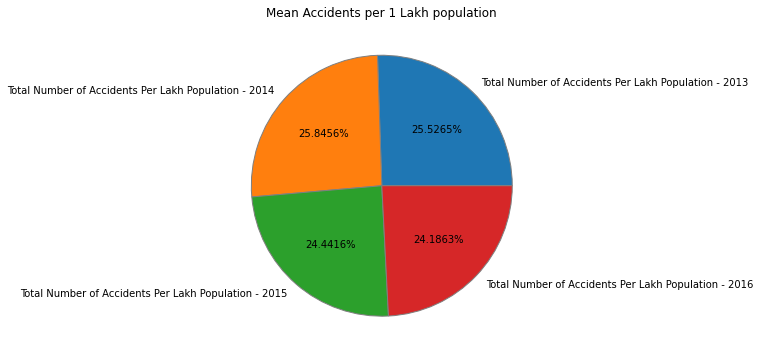

In [8]:
plt.figure(figsize=(6,6))
plt.pie(np.array(df.iloc[-1,10:14]),labels=df.columns[10:14],autopct='%2.4f%%',wedgeprops= {"edgecolor":"grey",
                     'linewidth': 1,
                     'antialiased': True})
plt.title('Mean Accidents per 1 Lakh population')
plt.show()

**3. The highest number of accident states and least number of accident states.**

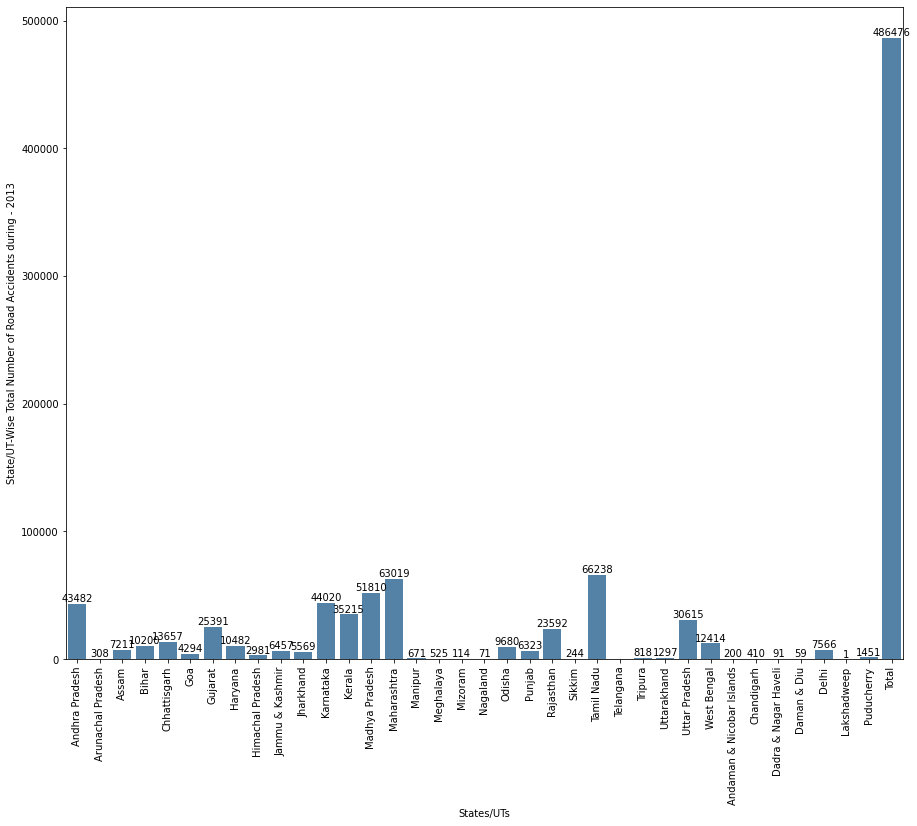

In [9]:
plt.figure(figsize=(15,12))
ax =sns.barplot(x=df['States/UTs'],y=df['State/UT-Wise Total Number of Road Accidents during - 2013'],color='steelblue')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

From the Graph, we can say that Lakshadweep has less accidents i.e. 1 and Tamil Nadu has more accidents(66,238)

In [10]:
minmax_data = { 'years' : [2013,2014,2015,2016],
 'min' : [1.3,1.3,2.3,1.2],
 'max' : [229.9,220.8,222.1,217.7]
}
df_minmax=pd.DataFrame(minmax_data)
df_minmax

,years,min,max
0,2013,1.3,229.9
1,2014,1.3,220.8
2,2015,2.3,222.1
3,2016,1.2,217.7


Plotting the Min and Max number of accidents per lakh population in respective years

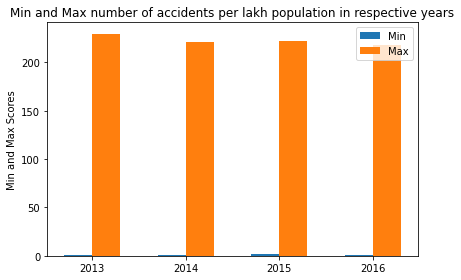

In [11]:
years = [2013,2014,2015,2016]
#y-axis
min_values = [1.3,1.3,2.3,1.2]
max_values = [229.9,220.8,222.1,217.7]

#bar chart properties
x = np.arange(len(years))
width = 0.3

#draw grouped bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, min_values, width, label='Min')
bar2 = ax.bar(x + width/2, max_values, width, label='Max')

#ax.set_xlabel('Year')
ax.set_ylabel('Min and Max Scores')
ax.set_title('Min and Max number of accidents per lakh population in respective years')
ax.set_xticks(x,years)
ax.legend()

#setting bar labels
#ax.bar_label(bar1)
#ax.bar_label(bar2)

fig.tight_layout()

plt.show()

Displayng df1 = Details_of_road_accident_deaths_by_situation_state_2014.csv file

In [12]:
df1

,States/UTs,Year,CrimeHead,Offenders (Driver/Pedestrian) Died_Male,Offenders (Driver/Pedestrian) Died_Female,Offenders (Driver/Pedestrian) Died_Transgender,Offenders (Driver/Pedestrian) Died_Total,Victims Died_Male,Victims Died_Female,Victims Died_Transgender,Victims Died_Total
0,Andhra Pradesh,2014,Truck/Lorry (Total),445,30,0,475,871,135,0,1006
1,Andhra Pradesh,2014,Truck/Lorry - Normal Goods Carriers,357,25,0,382,577,101,0,678
2,Andhra Pradesh,2014,Truck/Lorry - Trailer/Container Carriers,12,0,0,12,25,0,0,25
3,Andhra Pradesh,2014,Truck/Lorry - Tankers,10,0,0,10,102,15,0,117
4,Andhra Pradesh,2014,Truck/Lorry - Others,66,5,0,71,167,19,0,186
...,...,...,...,...,...,...,...,...,...,...,...
1438,Total (All India),2014,Animal Drawn Vehicle,22,2,0,24,60,13,0,73
1439,Total (All India),2014,Pedestrian,560,187,0,747,4821,1120,2,5943
1440,Total (All India),2014,Others,910,285,0,1195,2772,647,0,3419
1441,Total (All India),2014,Sub Total - (Bicycle + Hand Drawn Vehicle/Cycl...,1847,510,0,2357,8535,1870,2,10407


Displaying the Number of Female/Male/Transgender dies in Offenders(Drive/Pedestraion) way

**4. Offenders and victims who died according to gender as well the as the total deaths.**

In [13]:
df1.iloc[-1,3:6]

Offenders (Driver/Pedestrian) Died_Male           31449
Offenders (Driver/Pedestrian) Died_Female          2803
Offenders (Driver/Pedestrian) Died_Transgender        0
Name: 1442, dtype: object

31449 Men 2803 Women and 0 Transgenders Offenders genders are died

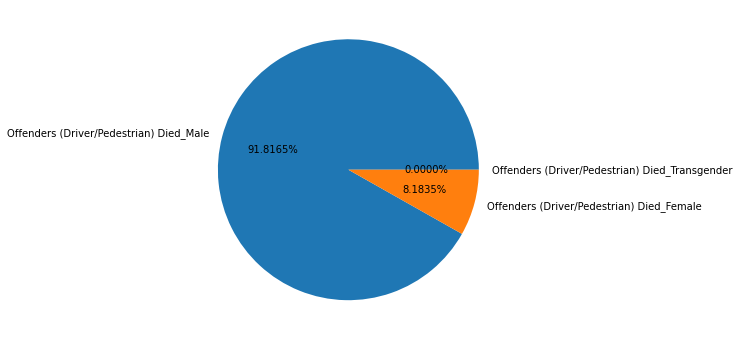

In [14]:
np.array(df1.iloc[-1,3:6])
plt.figure(figsize=(6,6))
plt.pie(np.array(df1.iloc[-1,3:6]),labels=df1.columns[3:6],autopct='%2.4f%%')
plt.show()

Displaying the Victims of Female/Male/Transgender died inform og piegraph

In [15]:
np.array(df1.iloc[-1,7:10])

array([89683, 17574, 17], dtype=object)

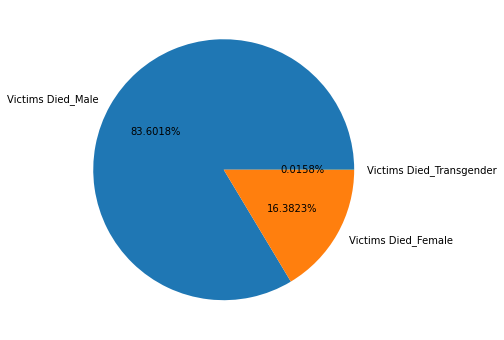

In [16]:
plt.figure(figsize=(6,6))
plt.pie(np.array(df1.iloc[-1,7:10]),labels=df1.columns[7:10],autopct='%2.4f%%')
plt.show()

Displaying Offenders Died Male/Female inform of PieGraph

In [17]:
print(df1['Offenders (Driver/Pedestrian) Died_Total'].tail(1))
print(df1['Victims Died_Total'].tail(1))

1442    34252
Name: Offenders (Driver/Pedestrian) Died_Total, dtype: int64
1442    107274
Name: Victims Died_Total, dtype: int64


34252 Men and 107274 Women Victims died in total

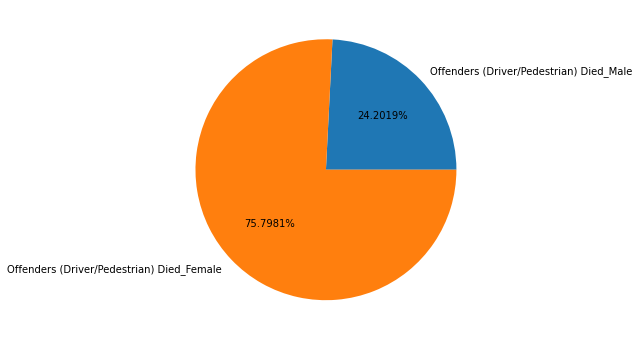

In [18]:
plt.figure(figsize=(6,6))
plt.pie(np.array([34252,107274]),labels=df1.columns[3:5],autopct='%2.4f%%')
plt.show()

Displaying df2 = Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv dataset

In [19]:
df2

,S. No.,State/ UT,Non-wearing of Helmet - Male,Non-wearing of Helmet - Female,Non-wearing of Helmet - Total,Non-wearing of seat belt - Male,Non-wearing of seat belt - Female,Non-wearing of seat belt - Total
0,1,Andhra Pradesh,459,18,477,222,15,237
1,2,Arunachal Pradesh,10,4,14,0,0,0
2,3,Assam,0,0,0,0,0,0
3,4,Bihar,0,0,0,0,0,0
4,5,Chhattisgarh,89,7,96,6,0,6
5,6,Goa,174,0,174,37,4,41
6,7,Gujarat,103,3,106,86,19,105
7,8,Haryana,79,1,80,25,0,25
8,9,Himachal Pradesh,123,2,125,400,50,450
9,10,Jammu & Kashmir,0,0,0,0,0,0


**5. Percentage of Deaths occurring due to non-wearing of helmets between male and female.**

In [20]:
df2_pie=np.array(df2.iloc[-1,2:4])

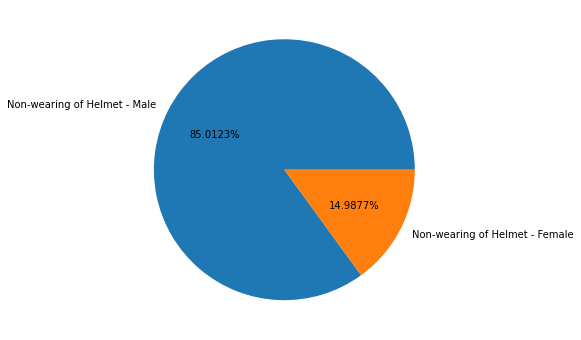

In [21]:
plt.figure(figsize=(6,6))
plt.pie(np.array(df2.iloc[-1,2:4]),labels=df2.columns[2:4],autopct='%2.4f%%')
plt.show()

85.0123 % of Men and 14.9877 Percent of Women died because of not wearing the helmet

In [22]:
df3

,States/Uts,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Andhra Pradesh,8616.0,9343.0,9126.0,11378.0,11885.0,12233.0,12676.0,13932.0,13783.0,13560.0,13175.0,7277,7524,7851
1,Arunachal Pradesh,65.0,79.0,63.0,87.0,81.0,90.0,114.0,108.0,96.0,94.0,120.0,92,117,103
2,Assam,1120.0,1177.0,1420.0,1627.0,1483.0,1641.0,1735.0,1924.0,2015.0,2011.0,2162.0,2169,2122,2445
3,Bihar,2138.0,1579.0,1462.0,2315.0,3074.0,3514.0,4038.0,4513.0,4676.0,4706.0,4612.0,4505,4771,4425
4,Chhattisgarh,1788.0,1892.0,2049.0,2288.0,2496.0,2600.0,2566.0,2668.0,2659.0,2783.0,3059.0,3570,3710,3527
5,Goa,207.0,281.0,220.0,290.0,300.0,294.0,298.0,307.0,314.0,271.0,249.0,283,302,316
6,Gujarat,4335.0,4671.0,4922.0,5435.0,5958.0,6132.0,6112.0,6648.0,7045.0,6896.0,6786.0,7063,7332,7296
7,Haryana,2722.0,3032.0,3010.0,3483.0,3980.0,4071.0,4227.0,4168.0,4255.0,3963.0,4095.0,4214,4430,4636
8,Himachal Pradesh,507.0,527.0,549.0,577.0,659.0,568.0,760.0,766.0,735.0,732.0,736.0,831,843,1000
9,Jammu & Kashmir,609.0,669.0,660.0,646.0,717.0,694.0,773.0,814.0,846.0,863.0,809.0,886,749,734


Displaying the number of Accidents happened every year from 2013 to 2016 inform of Line Chart

**6. The number of accidents happening per state from the year 2003 to 2016.**

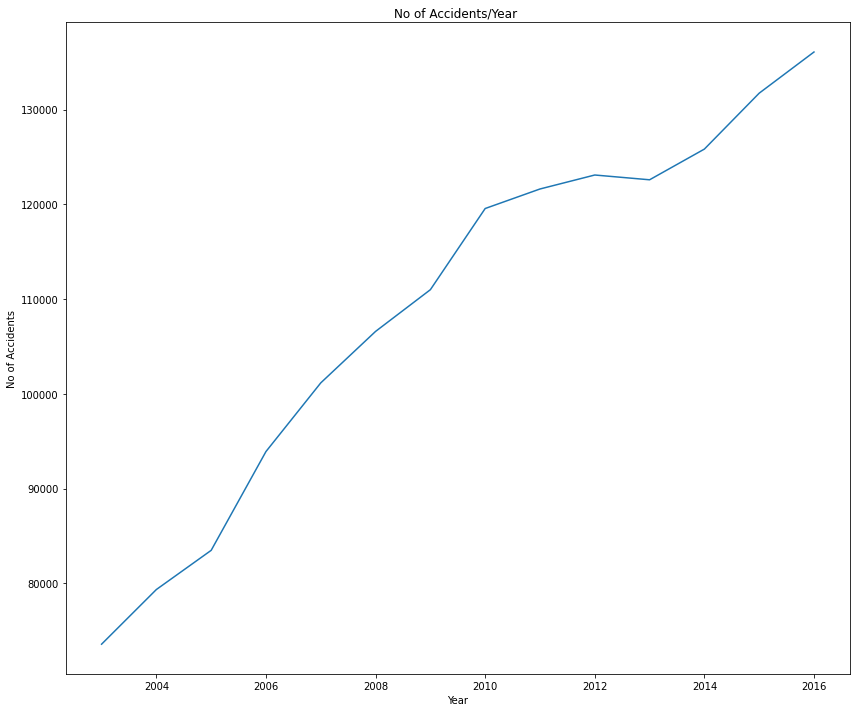

In [23]:
years = list(df3.columns[1:])

year=[]
for i in range(len(years)):
    if type(years[i]) == str:
        year.append(int(years[i]))

years = np.array(year)
total_accidents = np.array(df3.iloc[36,1:])
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(year,total_accidents)

ax.set_xlabel('Year')
ax.set_ylabel('No of Accidents')
ax.set_title('No of Accidents/Year ')

fig.tight_layout()

plt.show()

6. No of Accidents has been Increased drastically Over the Years from 2003 to 2016

Displaying laneAccidents.csv Dataset

In [24]:
df4

,S.No,State/UT,Single Lane - Accident - 2014,Single Lane - Accident - 2014 per 1L people,Single Lane - Killed - 2014,Single Lane - Killed - 2014 per 1L people,Single Lane - Injured - 2014,Single Lane - Injured - 2014 per 1L people,Two Lanes - Accident - 2014,Two Lanes - Accident - 2014 per 1L people,Two Lanes - Killed - 2014,Two Lanes - Killed - 2014 per 1L people,Two Lanes - Injured - 2014,Two Lanes - Injured - 2014 per 1L people,3 Lanes or more w.o Median - Accident - 2014,3 Lanes or more w.o Median - Accident - 2014 per 1L people,3 Lanes or more w.o Median - Killed - 2014,3 Lanes or more w.o Median - Killed - 2014 per 1L people,3 Lanes or more w.o Median - Injured - 2014,3 Lanes or more w.o Median - Injured - 2014 per 1L people,4 Lanes with Median - Accident - 2014,4 Lanes with Median - Accident - 2014 per 1L people,4 Lanes with Median - Killed - 2014,4 Lanes with Median - Killed - 2014 per 1L people,4 Lanes with Median - Injured - 2014,4 Lanes with Median - Injured - 2014 per 1L people,Population
0,1,Andhra Pradesh,8634.0,16.473750,2958.0,5.643891,13541.0,25.836350,10327.0,19.704009,2994.0,5.712579,10122.0,19.312868,1188.0,2.266715,396.0,0.755572,1199.0,2.287703,4291.0,8.187267,1560.0,2.976494,5069.0,9.671698,52410653
1,2,Arunachal Pradesh,90.0,6.504173,60.0,4.336115,152.0,10.984826,115.0,8.310888,59.0,4.263847,156.0,11.273900,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1383727
2,3,Assam,3888.0,12.459312,1217.0,3.899944,3195.0,10.238555,2432.0,7.793479,1035.0,3.316715,2510.0,8.043434,56.0,0.179455,25.0,0.080114,42.0,0.134591,768.0,2.461099,245.0,0.785116,752.0,2.409826,31205576
3,4,Bihar,3731.0,3.584073,1815.0,1.743525,2475.0,2.377534,4156.0,3.992336,2096.0,2.013459,3092.0,2.970237,756.0,0.726229,390.0,0.374642,485.0,0.465901,913.0,0.877046,612.0,0.587899,588.0,0.564844,104099452
4,5,Chhattisgarh,7961.0,31.164370,2244.0,8.784430,7762.0,30.385359,4696.0,18.383103,1524.0,5.965896,4661.0,18.246091,0.0,0.000000,0.0,0.000000,0.0,0.000000,1164.0,4.556629,254.0,0.994316,734.0,2.873338,25545198
5,6,Goa,2523.0,172.980607,187.0,12.820996,1091.0,74.800572,1706.0,116.965880,103.0,7.061832,788.0,54.026444,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1458545
6,7,Gujarat,10978.0,18.163560,3101.0,5.130734,10673.0,17.658925,7475.0,12.367700,2669.0,4.415972,7101.0,11.748902,642.0,1.062216,248.0,0.410326,526.0,0.870289,4617.0,7.639020,1937.0,3.204848,4193.0,6.937494,60439692
7,8,Haryana,4090.0,16.133192,1565.0,6.173214,3485.0,13.746742,3420.0,13.490346,1451.0,5.723536,2875.0,11.340569,722.0,2.847962,340.0,1.341146,390.0,1.538373,2444.0,9.640470,1127.0,4.445503,2194.0,8.654333,25351462
8,9,Himachal Pradesh,1183.0,17.233337,528.0,7.691633,2322.0,33.825705,1875.0,27.314038,671.0,9.774784,3254.0,47.402603,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,6864602
9,10,Jammu & Kashmir,3761.0,29.988912,548.0,4.369562,4129.0,32.923216,1935.0,15.429020,419.0,3.340961,3654.0,29.135731,112.0,0.893049,21.0,0.167447,202.0,1.610678,53.0,0.422604,4.0,0.031895,58.0,0.462472,12541302


**7.	Number of ACCIDENTS for 1,2,3,4 LANE per 1L population of resp. state.**

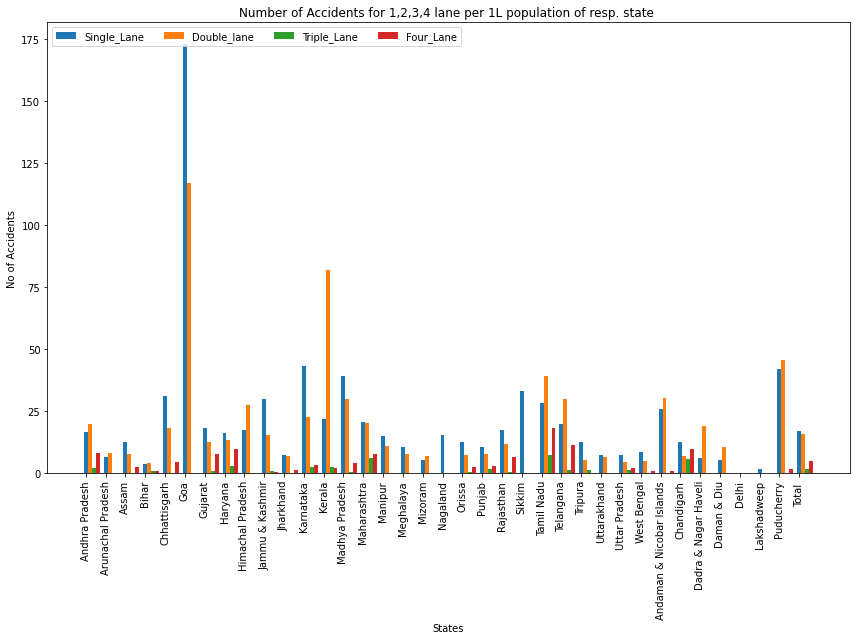

In [25]:
states = np.array(df4['State/UT'])
#y-axis
Single_Lane = np.array(df4['Single Lane - Accident - 2014 per 1L people'])
Double_lane = np.array(df4['Two Lanes - Accident - 2014 per 1L people'])
Triple_Lane = np.array(df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people'])
Four_Lane = np.array(df4['4 Lanes with Median - Accident - 2014 per 1L people'])

#bar chart properties
x = np.arange(len(states))
width = 0.20

#draw grouped bar chart
fig, ax = plt.subplots(figsize=(12,9))
bar1 = ax.bar(x , Single_Lane, width, label='Single_Lane')
bar2 = ax.bar(x + width, Double_lane, width, label='Double_lane')
bar3 = ax.bar(x + width+width, Triple_Lane, width, label='Triple_Lane')
bar4 = ax.bar(x + width+2*width, Four_Lane, width, label='Four_Lane')

ax.set_xlabel('States')
ax.set_ylabel('No of Accidents')
ax.set_title('Number of Accidents for 1,2,3,4 lane per 1L population of resp. state ')
ax.set_xticks(x,states,rotation=90)
ax.legend(loc='upper left', ncols=10)



fig.tight_layout()

plt.show()

**8.	Number of people INJURED for 1,2,3,4 type of lane per 1L population of resp. State.**

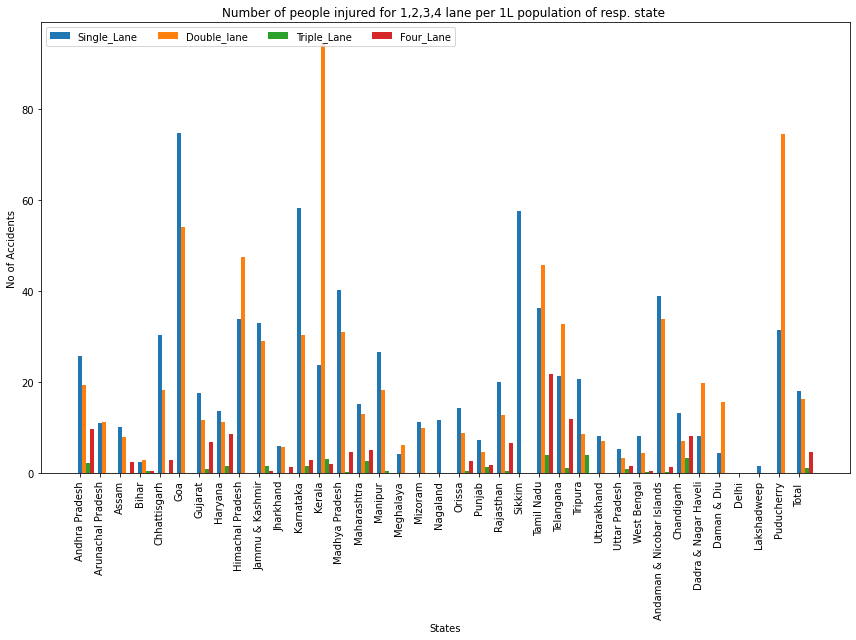

In [26]:
states = np.array(df4['State/UT'])
#y-axis
Single_Lane = np.array(df4['Single Lane - Injured - 2014 per 1L people'])
Double_lane = np.array(df4['Two Lanes - Injured - 2014 per 1L people'])
Triple_Lane = np.array(df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people'])
Four_Lane = np.array(df4['4 Lanes with Median - Injured - 2014 per 1L people'])

#bar chart properties
x = np.arange(len(states))
width = 0.20

#draw grouped bar chart
fig, ax = plt.subplots(figsize=(12,9))
bar1 = ax.bar(x , Single_Lane, width, label='Single_Lane')
bar2 = ax.bar(x + width, Double_lane, width, label='Double_lane')
bar3 = ax.bar(x + width+width, Triple_Lane, width, label='Triple_Lane')
bar4 = ax.bar(x + width+2*width, Four_Lane, width, label='Four_Lane')

ax.set_xlabel('States')
ax.set_ylabel('No of Accidents')
ax.set_title('Number of people injured for 1,2,3,4 lane per 1L population of resp. state ')
ax.set_xticks(x,states,rotation=90)
ax.legend(loc='upper left', ncols=10)



fig.tight_layout()

plt.show()

**9.	Number of people KILLED for 1,2,3,4 LANES per 1L population of resp. States.**

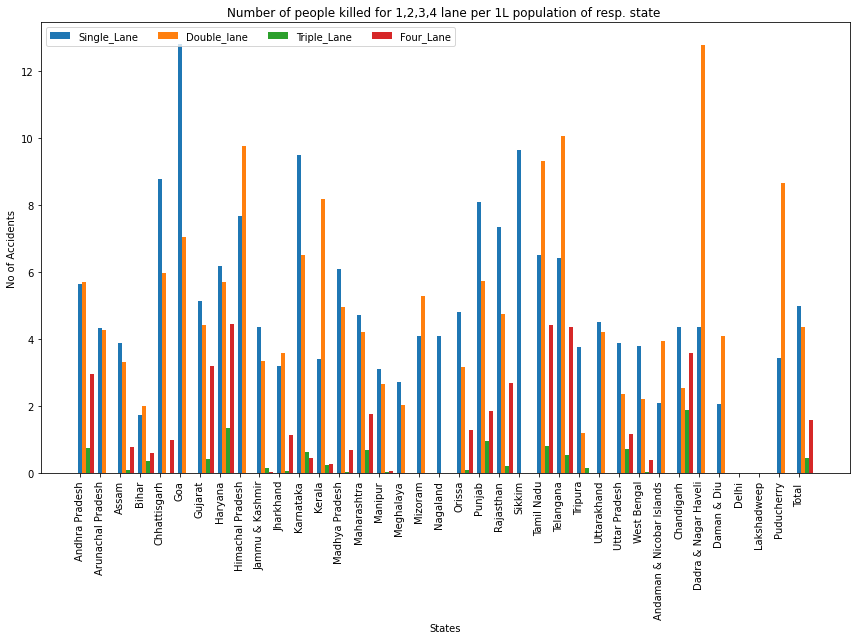

In [27]:
states = np.array(df4['State/UT'])
#y-axis
Single_Lane = np.array(df4['Single Lane - Killed - 2014 per 1L people'])
Double_lane = np.array(df4['Two Lanes - Killed - 2014 per 1L people'])
Triple_Lane = np.array(df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people'])
Four_Lane = np.array(df4['4 Lanes with Median - Killed - 2014 per 1L people'])

#bar chart properties
x = np.arange(len(states))
width = 0.20

#draw grouped bar chart
fig, ax = plt.subplots(figsize=(12,9))
bar1 = ax.bar(x , Single_Lane, width, label='Single_Lane')
bar2 = ax.bar(x + width, Double_lane, width, label='Double_lane')
bar3 = ax.bar(x + width+width, Triple_Lane, width, label='Triple_Lane')
bar4 = ax.bar(x + width+2*width, Four_Lane, width, label='Four_Lane')

ax.set_xlabel('States')
ax.set_ylabel('No of Accidents')
ax.set_title('Number of people killed for 1,2,3,4 lane per 1L population of resp. state ')
ax.set_xticks(x,states,rotation=90)
ax.legend(loc='upper left', ncols=10)



fig.tight_layout()

plt.show()

**10.	Number of Accidents, people KILLED, INJURED on SINGLE LANE per 1L population.**

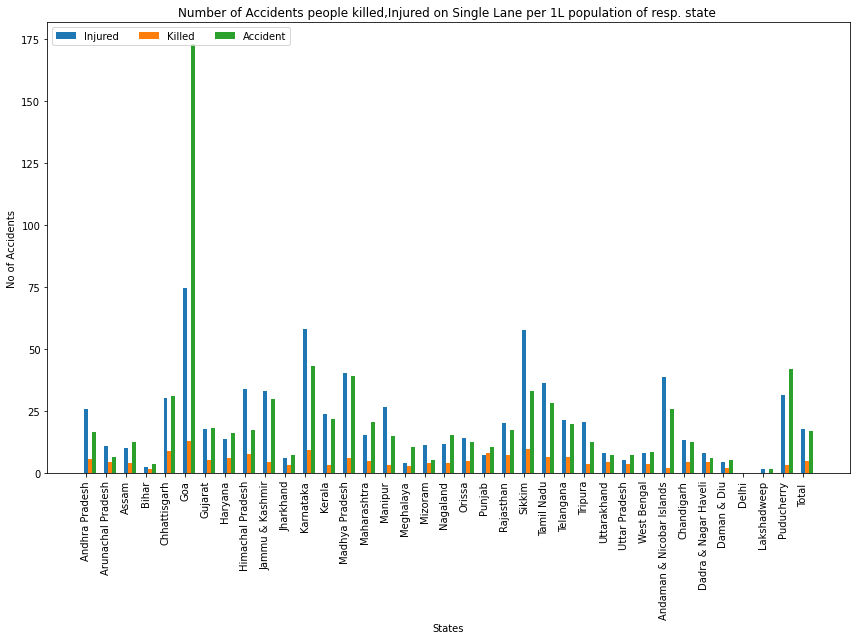

In [28]:
states = np.array(df4['State/UT'])
#y-axis
Single_Lane = np.array(df4['Single Lane - Injured - 2014 per 1L people'])
Double_lane = np.array(df4['Single Lane - Killed - 2014 per 1L people'])
Triple_Lane = np.array(df4['Single Lane - Accident - 2014 per 1L people'])

 #bar chart properties
x = np.arange(len(states))
width = 0.20

#draw grouped bar chart
fig, ax = plt.subplots(figsize=(12,9))
bar1 = ax.bar(x , Single_Lane, width, label='Injured')
bar2 = ax.bar(x + width, Double_lane, width, label='Killed')
bar3 = ax.bar(x + width+width, Triple_Lane, width, label='Accident')


ax.set_xlabel('States')
ax.set_ylabel('No of Accidents')
ax.set_title('Number of Accidents people killed,Injured on Single Lane per 1L population of resp. state ')
ax.set_xticks(x,states,rotation=90)
ax.legend(loc='upper left', ncols=10)



fig.tight_layout()

plt.show()

**11.	Number of accidents, people INJURED, KILLED on DOUBLE LANE per 1L population.**

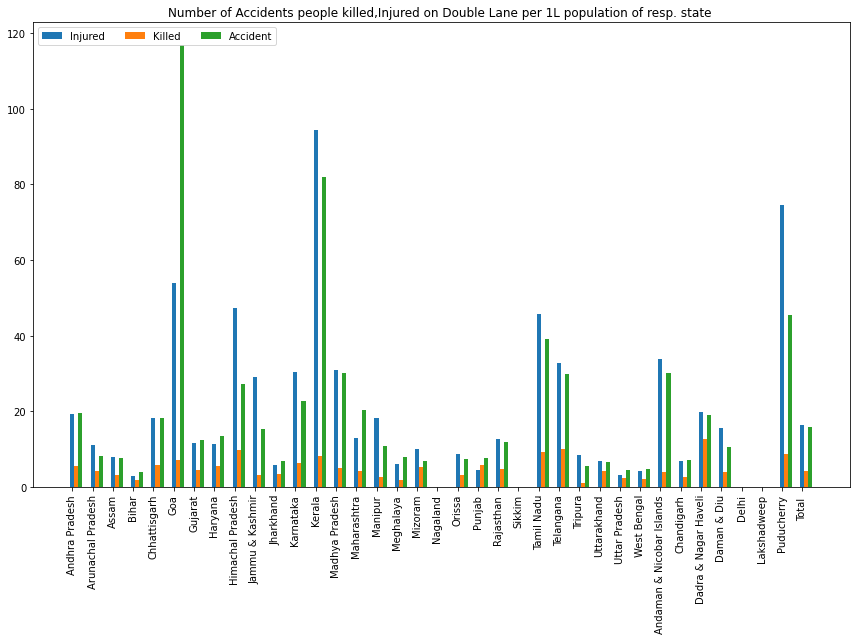

In [29]:
states = np.array(df4['State/UT'])
#y-axis
Single_Lane = np.array(df4['Two Lanes - Injured - 2014 per 1L people'])
Double_lane = np.array(df4['Two Lanes - Killed - 2014 per 1L people'])
Triple_Lane = np.array(df4['Two Lanes - Accident - 2014 per 1L people'])

 #bar chart properties
x = np.arange(len(states))
width = 0.20

#draw grouped bar chart
fig, ax = plt.subplots(figsize=(12,9))
bar1 = ax.bar(x , Single_Lane, width, label='Injured')
bar2 = ax.bar(x + width, Double_lane, width, label='Killed')
bar3 = ax.bar(x + width+width, Triple_Lane, width, label='Accident')


#ax.set_xlabel('Year')
ax.set_title('Number of Accidents people killed,Injured on Double Lane per 1L population of resp. state ')
ax.set_xticks(x,states,rotation=90)
ax.legend(loc='upper left', ncols=10)



fig.tight_layout()

plt.show()

**12.	Number of accidents, people INJURED, KILLED on THREE LANE per 1L population.**

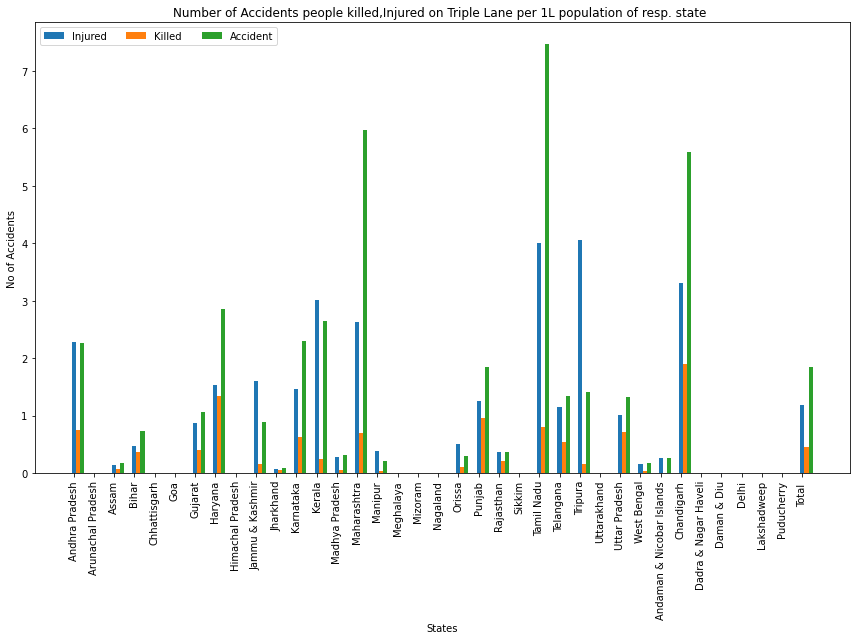

In [30]:
states = np.array(df4['State/UT'])
#y-axis
Single_Lane = np.array(df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people'])
Double_lane = np.array(df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people'])
Triple_Lane = np.array(df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people'])

 #bar chart properties
x = np.arange(len(states))
width = 0.20

#draw grouped bar chart
fig, ax = plt.subplots(figsize=(12,9))
bar1 = ax.bar(x , Single_Lane, width, label='Injured')
bar2 = ax.bar(x + width, Double_lane, width, label='Killed')
bar3 = ax.bar(x + width+width, Triple_Lane, width, label='Accident')


ax.set_xlabel('States')
ax.set_ylabel('No of Accidents')
ax.set_title('Number of Accidents people killed,Injured on Triple Lane per 1L population of resp. state ')
ax.set_xticks(x,states,rotation=90)
ax.legend(loc='upper left', ncols=10)



fig.tight_layout()

plt.show()

**13.	Number of accidents, people INJURED, KILLED on FOUR LANE per 1L population.**

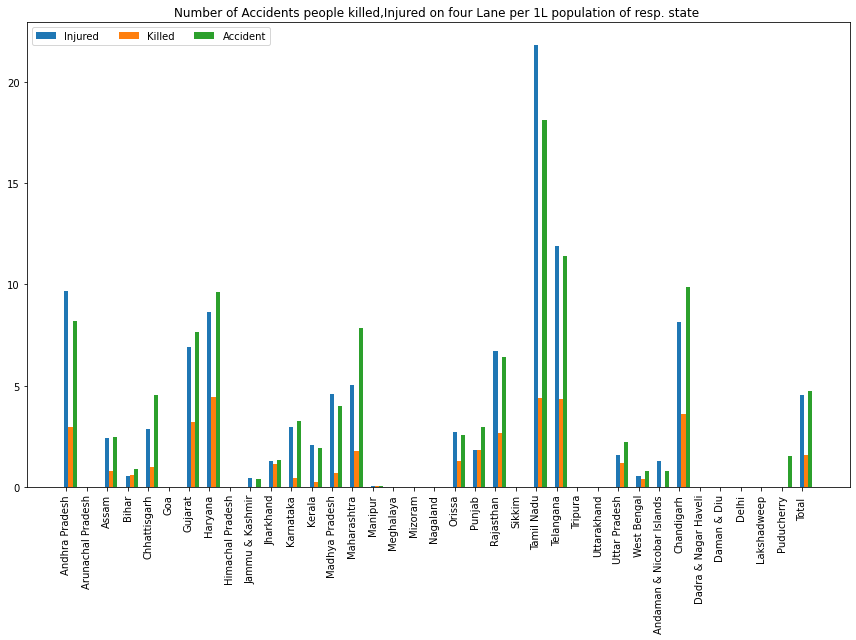

In [31]:
states = np.array(df4['State/UT'])
#y-axis
Single_Lane = np.array(df4['4 Lanes with Median - Injured - 2014 per 1L people'])
Double_lane = np.array(df4['4 Lanes with Median - Killed - 2014 per 1L people'])
Triple_Lane = np.array(df4['4 Lanes with Median - Accident - 2014 per 1L people'])

 #bar chart properties
x = np.arange(len(states))
width = 0.20

#draw grouped bar chart
fig, ax = plt.subplots(figsize=(12,9))
bar1 = ax.bar(x , Single_Lane, width, label='Injured')
bar2 = ax.bar(x + width, Double_lane, width, label='Killed')
bar3 = ax.bar(x + width+width, Triple_Lane, width, label='Accident')


#ax.set_xlabel('Year')
ax.set_title('Number of Accidents people killed,Injured on four Lane per 1L population of resp. state ')
ax.set_xticks(x,states,rotation=90)
ax.legend(loc='upper left', ncols=10)



fig.tight_layout()

plt.show()

**14.	Total Number of INJURED, KILLED, ROAD ACCIDENTS irrespective of lanes per 1L population of resp. State.**

In [32]:
df4['Injured'] = df4['Single Lane - Injured - 2014 per 1L people'] + df4['Two Lanes - Injured - 2014 per 1L people'] + df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people'] + df4['4 Lanes with Median - Injured - 2014 per 1L people']
df4['Killed'] = df4['Single Lane - Killed - 2014 per 1L people'] + df4['Two Lanes - Killed - 2014 per 1L people'] + df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people'] + df4['4 Lanes with Median - Killed - 2014 per 1L people']
df4['Accidents'] = df4['Single Lane - Accident - 2014 per 1L people'] + df4['Two Lanes - Accident - 2014 per 1L people'] + df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people'] + df4['4 Lanes with Median - Accident - 2014 per 1L people']

In [33]:
df4

,S.No,State/UT,Single Lane - Accident - 2014,Single Lane - Accident - 2014 per 1L people,Single Lane - Killed - 2014,Single Lane - Killed - 2014 per 1L people,Single Lane - Injured - 2014,Single Lane - Injured - 2014 per 1L people,Two Lanes - Accident - 2014,Two Lanes - Accident - 2014 per 1L people,Two Lanes - Killed - 2014,Two Lanes - Killed - 2014 per 1L people,Two Lanes - Injured - 2014,Two Lanes - Injured - 2014 per 1L people,3 Lanes or more w.o Median - Accident - 2014,3 Lanes or more w.o Median - Accident - 2014 per 1L people,3 Lanes or more w.o Median - Killed - 2014,3 Lanes or more w.o Median - Killed - 2014 per 1L people,3 Lanes or more w.o Median - Injured - 2014,3 Lanes or more w.o Median - Injured - 2014 per 1L people,4 Lanes with Median - Accident - 2014,4 Lanes with Median - Accident - 2014 per 1L people,4 Lanes with Median - Killed - 2014,4 Lanes with Median - Killed - 2014 per 1L people,4 Lanes with Median - Injured - 2014,4 Lanes with Median - Injured - 2014 per 1L people,Population,Injured,Killed,Accidents
0,1,Andhra Pradesh,8634.0,16.473750,2958.0,5.643891,13541.0,25.836350,10327.0,19.704009,2994.0,5.712579,10122.0,19.312868,1188.0,2.266715,396.0,0.755572,1199.0,2.287703,4291.0,8.187267,1560.0,2.976494,5069.0,9.671698,52410653,57.108619,15.088536,46.631741
1,2,Arunachal Pradesh,90.0,6.504173,60.0,4.336115,152.0,10.984826,115.0,8.310888,59.0,4.263847,156.0,11.273900,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1383727,22.258726,8.599962,14.815061
2,3,Assam,3888.0,12.459312,1217.0,3.899944,3195.0,10.238555,2432.0,7.793479,1035.0,3.316715,2510.0,8.043434,56.0,0.179455,25.0,0.080114,42.0,0.134591,768.0,2.461099,245.0,0.785116,752.0,2.409826,31205576,20.826406,8.081889,22.893344
3,4,Bihar,3731.0,3.584073,1815.0,1.743525,2475.0,2.377534,4156.0,3.992336,2096.0,2.013459,3092.0,2.970237,756.0,0.726229,390.0,0.374642,485.0,0.465901,913.0,0.877046,612.0,0.587899,588.0,0.564844,104099452,6.378516,4.719525,9.179683
4,5,Chhattisgarh,7961.0,31.164370,2244.0,8.784430,7762.0,30.385359,4696.0,18.383103,1524.0,5.965896,4661.0,18.246091,0.0,0.000000,0.0,0.000000,0.0,0.000000,1164.0,4.556629,254.0,0.994316,734.0,2.873338,25545198,51.504788,15.744642,54.104102
5,6,Goa,2523.0,172.980607,187.0,12.820996,1091.0,74.800572,1706.0,116.965880,103.0,7.061832,788.0,54.026444,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1458545,128.827016,19.882828,289.946488
6,7,Gujarat,10978.0,18.163560,3101.0,5.130734,10673.0,17.658925,7475.0,12.367700,2669.0,4.415972,7101.0,11.748902,642.0,1.062216,248.0,0.410326,526.0,0.870289,4617.0,7.639020,1937.0,3.204848,4193.0,6.937494,60439692,37.215610,13.161880,39.232496
7,8,Haryana,4090.0,16.133192,1565.0,6.173214,3485.0,13.746742,3420.0,13.490346,1451.0,5.723536,2875.0,11.340569,722.0,2.847962,340.0,1.341146,390.0,1.538373,2444.0,9.640470,1127.0,4.445503,2194.0,8.654333,25351462,35.280017,17.683398,42.111970
8,9,Himachal Pradesh,1183.0,17.233337,528.0,7.691633,2322.0,33.825705,1875.0,27.314038,671.0,9.774784,3254.0,47.402603,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,6864602,81.228307,17.466417,44.547375
9,10,Jammu & Kashmir,3761.0,29.988912,548.0,4.369562,4129.0,32.923216,1935.0,15.429020,419.0,3.340961,3654.0,29.135731,112.0,0.893049,21.0,0.167447,202.0,1.610678,53.0,0.422604,4.0,0.031895,58.0,0.462472,12541302,64.132097,7.909865,46.733585


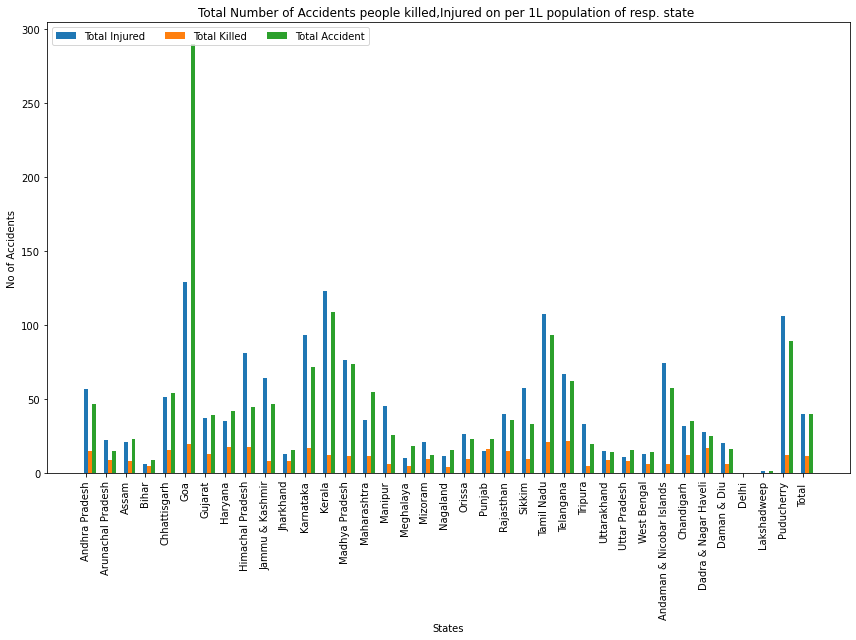

In [34]:
states = np.array(df4['State/UT'])
#y-axis
Single_Lane = np.array(df4['Injured'])
Double_lane = np.array(df4['Killed'])
Triple_Lane = np.array(df4['Accidents'])

 #bar chart properties
x = np.arange(len(states))
width = 0.20

#draw grouped bar chart
fig, ax = plt.subplots(figsize=(12,9))
bar1 = ax.bar(x , Single_Lane, width, label='Total Injured')
bar2 = ax.bar(x + width, Double_lane, width, label='Total Killed')
bar3 = ax.bar(x + width+width, Triple_Lane, width, label='Total Accident')


ax.set_xlabel('States')
ax.set_ylabel('No of Accidents')
ax.set_title('Total Number of Accidents people killed,Injured on per 1L population of resp. state ')
ax.set_xticks(x,states,rotation=90)
ax.legend(loc='upper left', ncols=10)



fig.tight_layout()

plt.show()

Displaying reasonOfAccident.csv Dataset

In [35]:
df5

,Sl. No,States/UTs,Fault of Driver-Total No. of Road Accidents - 2014,Fault of Driver-Total No. of Road Accidents - 2014 per 1L people,Fault of Driver-Number of Persons-Killed - 2014,Fault of Driver-Number of Persons-Killed - 2014 per 1L people,Fault of Driver-Number of Persons-Injured - 2014,Fault of Driver-Number of Persons-Injured - 2014 per 1L people,Fault of Driver of other vehicles-Total No. of Road Accidents - 2014,Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people,Fault of Driver of other vehicles-Number of Persons-Killed - 2014,Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people,Fault of Driver of other vehicles-Number of Persons-Injured - 2014,Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people,Fault of Pedestrian-Total No. of Road Accidents - 2014,Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people,Fault of Pedestrian-Number of Persons-Killed - 2014,Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people,Fault of Pedestrian-Number of Persons-Injured - 2014,Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people,Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014,Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people,Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014,Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people,Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014,Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people,Defect in Road Condition-Total No. of Road Accidents - 2014,Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people,Defect in Road Condition-Number of Persons-Killed - 2014,Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people,Defect in Road Condition-Number of Persons-Injured - 2014,Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people,Weather Condition-Total No. of Road Accidents - 2014,Weather Condition-Total No. of Road Accidents - 2014 per 1L people,Weather Condition-Number of Persons-Killed - 2014,Weather Condition-Number of Persons-Killed - 2014 per 1L people,Weather Condition-Number of Persons-Injured - 2014,Weather Condition-Number of Persons-Injured - 2014 per 1L people,Fault of Passenger-Total No. of Road Accidents - 2014,Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people,Fault of Passenger-Number of Persons-Killed - 2014,Fault of Passenger-Number of Persons-Killed - 2014 per 1L people,Fault of Passenger-Number of Persons-Injured - 2014,Fault of Passenger-Number of Persons-Injured - 2014 per 1L people,Poor light-Total No. of Road Accidents - 2014,Poor light-Total No. of Road Accidents - 2014 per 1L people,Poor light-Number of Persons-Killed - 2014,Poor light-Number of Persons-Killed - 2014 per 1L people,Poor light-Number of Persons-Injured - 2014,Poor light-Number of Persons-Injured - 2014 per 1L people,Falling of boulders-Total No. of Road Accidents - 2014,Falling of boulders-Total No. of Road Accidents - 2014 per 1L people,Falling of boulders-Number of Persons-Killed - 2014,Falling of boulders-Number of Persons-Killed - 2014 per 1L people,Falling of boulders-Number of Persons-Injured - 2014,Falling of boulders-Number of Persons-Injured - 2014 per 1L people,Other causes/causes not known-Total No. of Road Accidents - 2014,Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people,Other causes/causes not known-Number of Persons-Killed - 2014,Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people,Other causes/causes not known-Number of Persons-Injured - 2014,Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people,Population
0,1,Andhra Pradesh,21359.0,40.753165,6743,12.865705,26287.0,50.155834,288.0,0.549507,75,0.143101,425.0,0.810904,234.0,0.446474,104,0.198433,160.0,0.305281,67.0,0.127837,2

**15.	Number of people KILLED for each different REASON per 1L population of that state.**

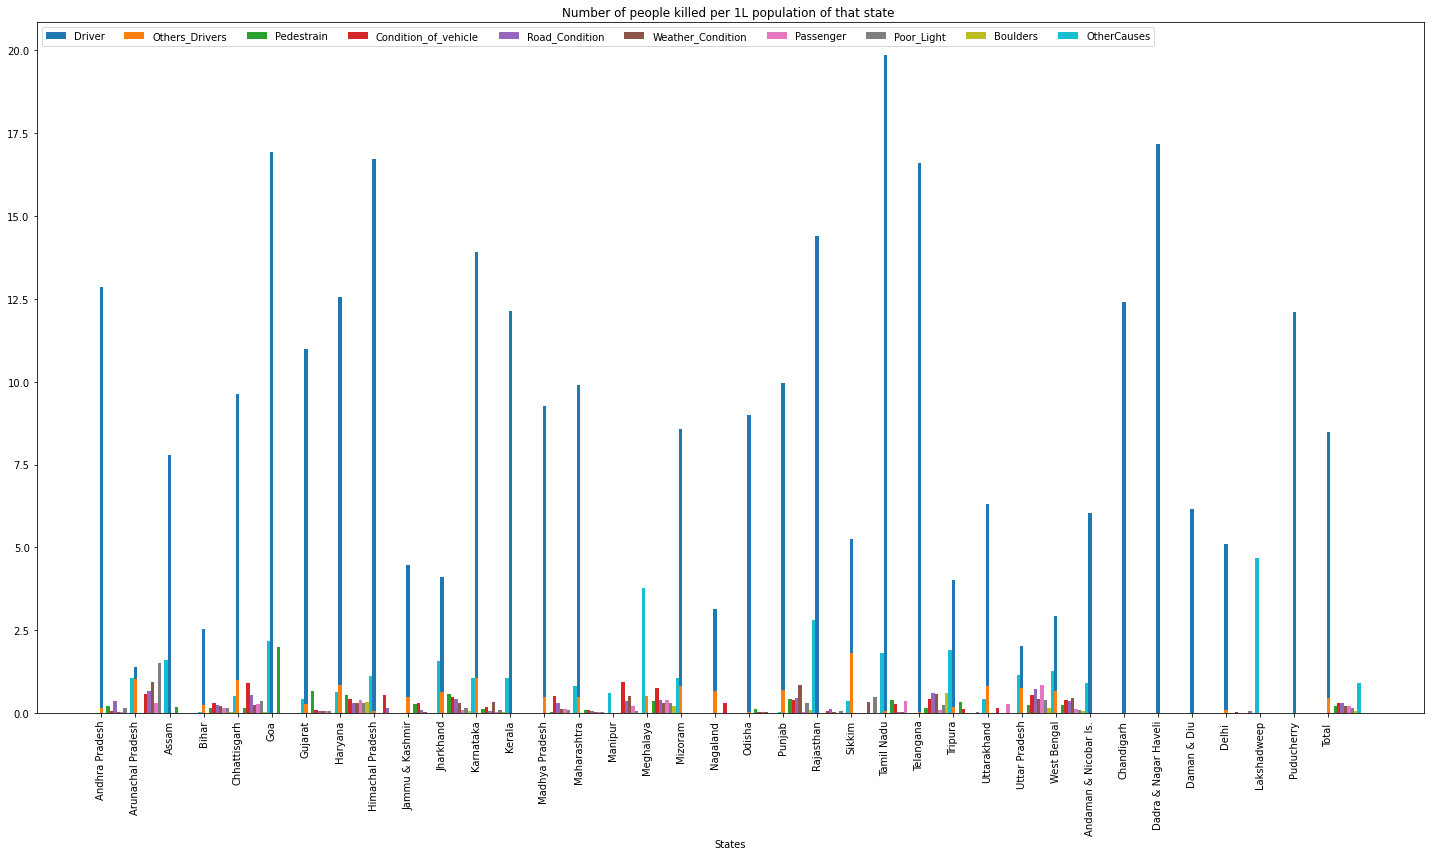

In [36]:
states = np.array(df5['States/UTs'])
#y-axis
Driver = np.array(df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people'])
Others_Drivers = np.array(df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people'])
Pedestrain = np.array(df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people'])
Condition_of_vehicle = np.array(df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people'])
Road_Condition = np.array(df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people'])
Weather_Condition = np.array(df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people'])
Passenger = np.array(df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people'])
Poor_Light = np.array(df5['Poor light-Number of Persons-Killed - 2014 per 1L people'])
Boulders = np.array(df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people'])
OtherCauses = np.array(df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people'])
 #bar chart properties
x = np.arange(len(states))
width = 0.1

#draw grouped bar chart
fig, ax = plt.subplots(figsize=(20,12))
bar1 = ax.bar(x , Driver, width, label='Driver')
bar2 = ax.bar(x , Others_Drivers, width, label='Others_Drivers')
bar3 = ax.bar(x + width+width, Pedestrain, width, label='Pedestrain')
bar4 = ax.bar(x + width*3 , Condition_of_vehicle, width, label='Condition_of_vehicle')
bar5 = ax.bar(x + width*4,Road_Condition, width, label='Road_Condition')
bar6 = ax.bar(x + width*5, Weather_Condition, width, label='Weather_Condition')
bar7 = ax.bar(x + width*6 , Passenger, width, label='Passenger')
bar8 = ax.bar(x + width*7, Poor_Light, width, label='Poor_Light')
bar9 = ax.bar(x + width*8, Boulders, width, label='Boulders')
bar10 = ax.bar(x + width*9, OtherCauses, width, label='OtherCauses')

ax.set_xlabel('States')
ax.set_title('Number of people killed per 1L population of that state ')
ax.set_xticks(x,states,rotation=90)
ax.legend(loc='upper left', ncols=10)


fig.tight_layout()

plt.show()

**15.	Number of people KILLED for each different REASON per 1L population of that state.**

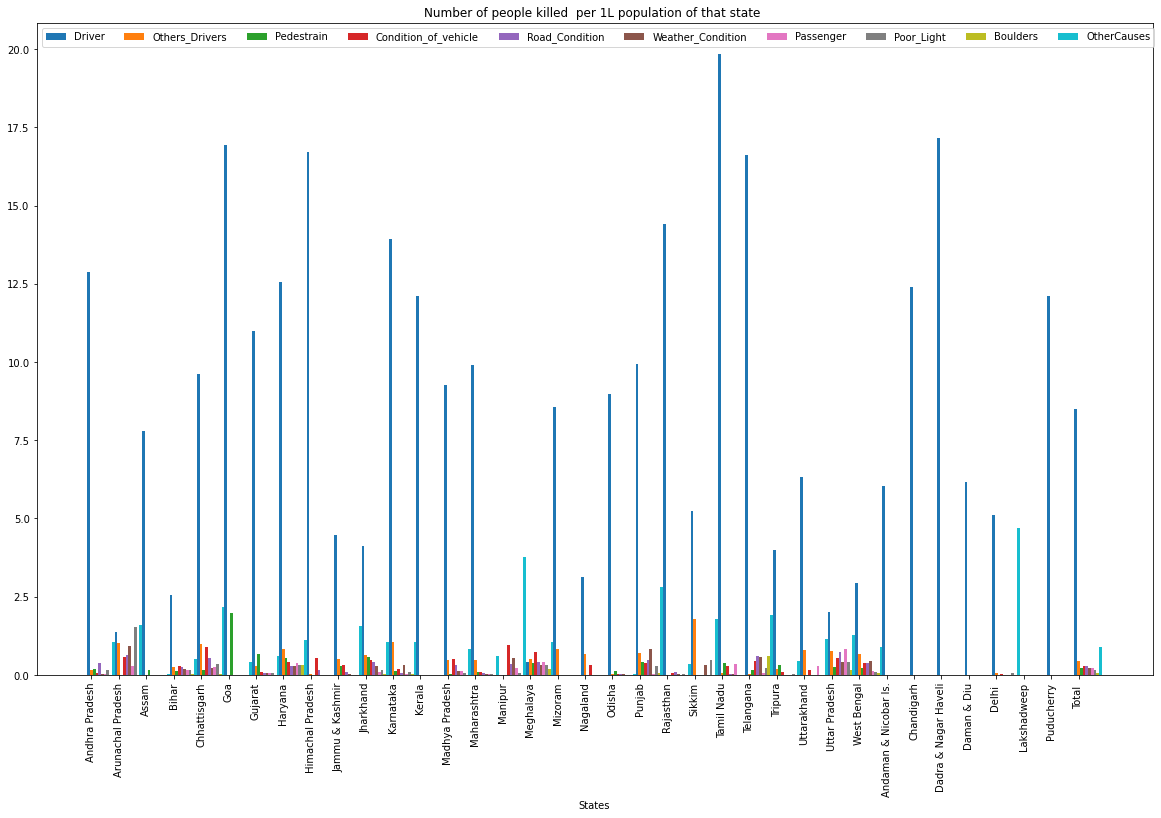

In [37]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Driver' : np.array(df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']),
'Others_Drivers' : np.array(df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']),
'Pedestrain' : np.array(df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']),
'Condition_of_vehicle' : np.array(df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']),
'Road_Condition' : np.array(df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']),
'Weather_Condition' : np.array(df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people']),
'Passenger' : np.array(df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']),
'Poor_Light' : np.array(df5['Poor light-Number of Persons-Killed - 2014 per 1L people']),
'Boulders' : np.array(df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']),
'OtherCauses' : np.array(df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people'])

}

x = np.arange(len(years))  # the label locations
width = 0.1 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of people killed  per 1L population of that state ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

**16.	Number of people INJURED for each reason per 1L people of that state.**

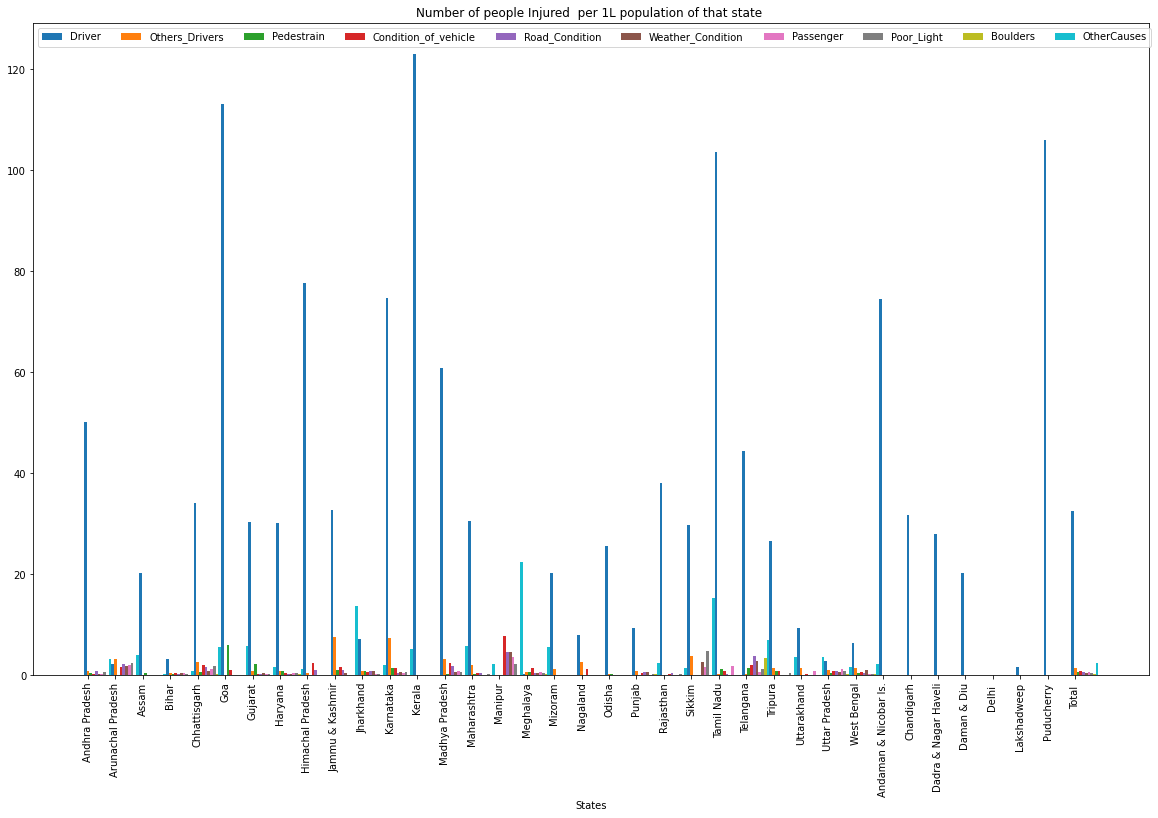

In [38]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Driver' : np.array(df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people']),
'Others_Drivers' : np.array(df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people']),
'Pedestrain' : np.array(df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people']),
'Condition_of_vehicle' : np.array(df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people']),
'Road_Condition' : np.array(df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people']),
'Weather_Condition' : np.array(df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people']),
'Passenger' : np.array(df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people']),
'Poor_Light' : np.array(df5['Poor light-Number of Persons-Injured - 2014 per 1L people']),
'Boulders' : np.array(df5['Falling of boulders-Number of Persons-Injured - 2014 per 1L people']),
'OtherCauses' : np.array(df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people'])

}

x = np.arange(len(years))  # the label locations
width = 0.1 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of people Injured  per 1L population of that state ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

**17.	Number of ACCIDENTS for each reason per 1L people of that state.**

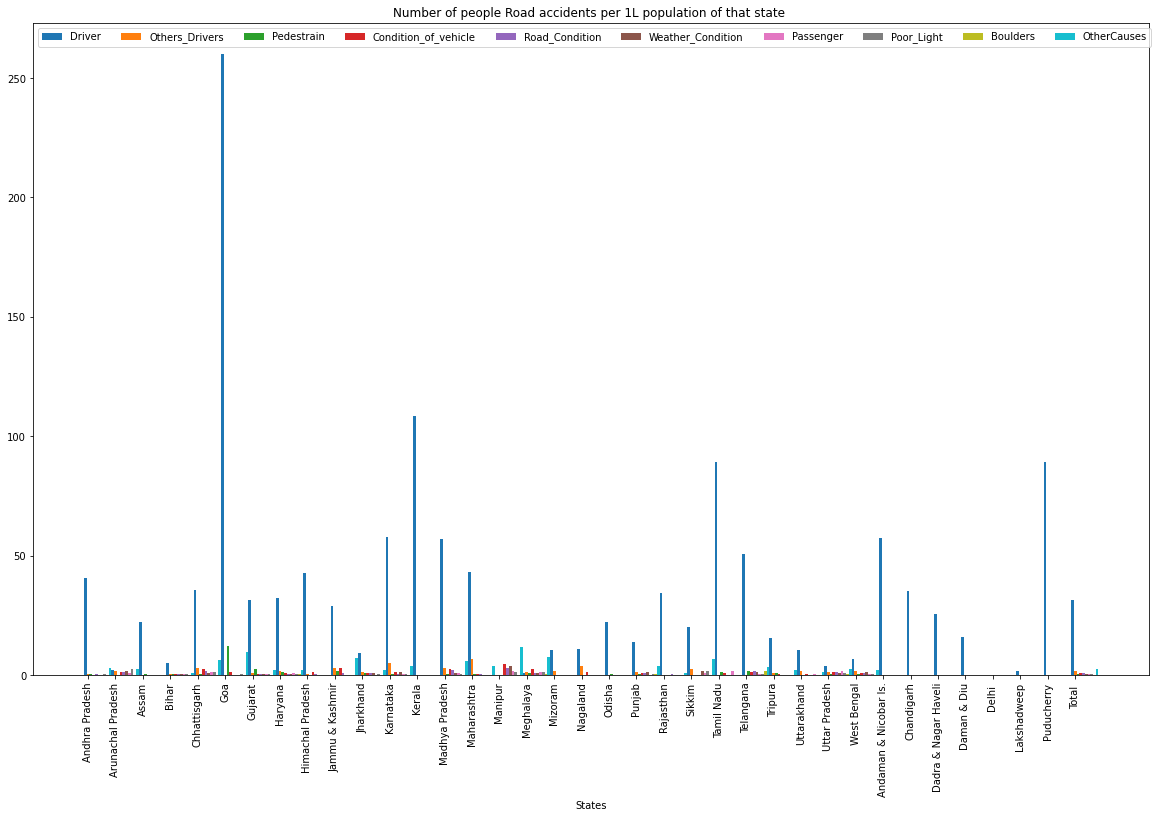

In [39]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Driver' : np.array(df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people']),
'Others_Drivers' : np.array(df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people']),
'Pedestrain' : np.array(df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people']),
'Condition_of_vehicle' : np.array(df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people']),
'Road_Condition' : np.array(df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people']),
'Weather_Condition' : np.array(df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people']),
'Passenger' : np.array(df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people']),
'Poor_Light' : np.array(df5['Poor light-Total No. of Road Accidents - 2014 per 1L people']),
'Boulders' : np.array(df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people']),
'OtherCauses' : np.array(df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people'])

}

x = np.arange(len(years))  # the label locations
width = 0.1 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of people Road accidents per 1L population of that state ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

**18.	Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FAULT OF THE DRIVER per 1L population of that state.**

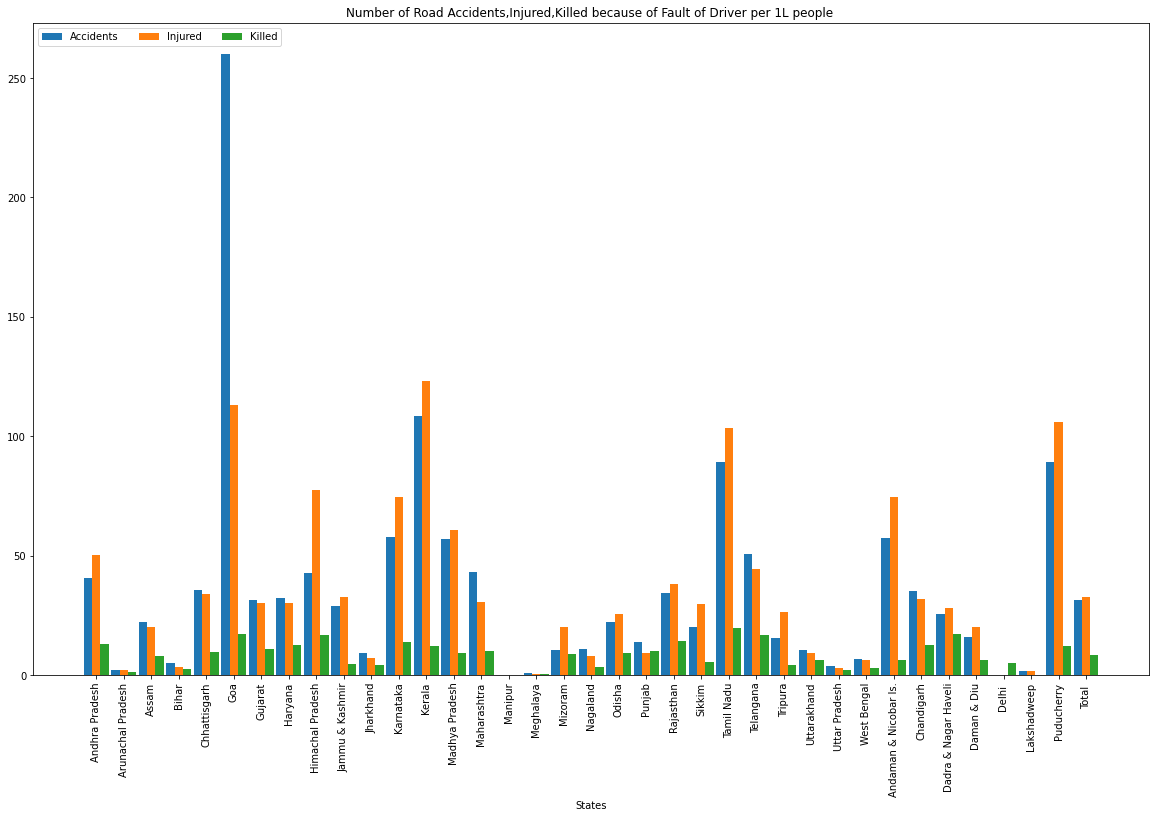

In [40]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Accidents' : np.array(df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people']),
'Injured' : np.array(df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people']),
'Killed' : np.array(df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']),

}

x = np.arange(len(years))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of Road Accidents,Injured,Killed because of Fault of Driver per 1L people ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

**19.	Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF DRIVER'S FROM OTHER VEHICLES per 1L people of that state.**

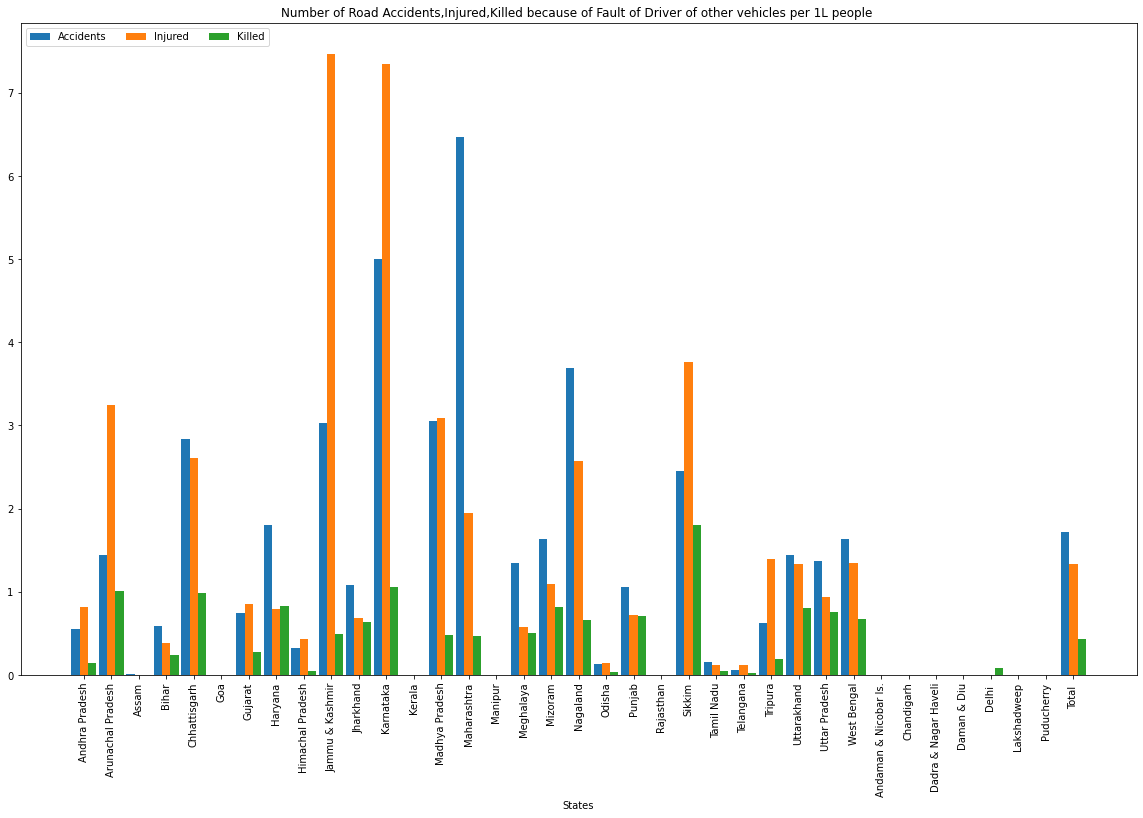

In [41]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Accidents' : np.array(df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people']),
'Injured' : np.array(df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people']),
'Killed' : np.array(df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']),

}

x = np.arange(len(years))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of Road Accidents,Injured,Killed because of Fault of Driver of other vehicles per 1L people ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

**20.	Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF PEDESTRIANS per 1L people of that state**

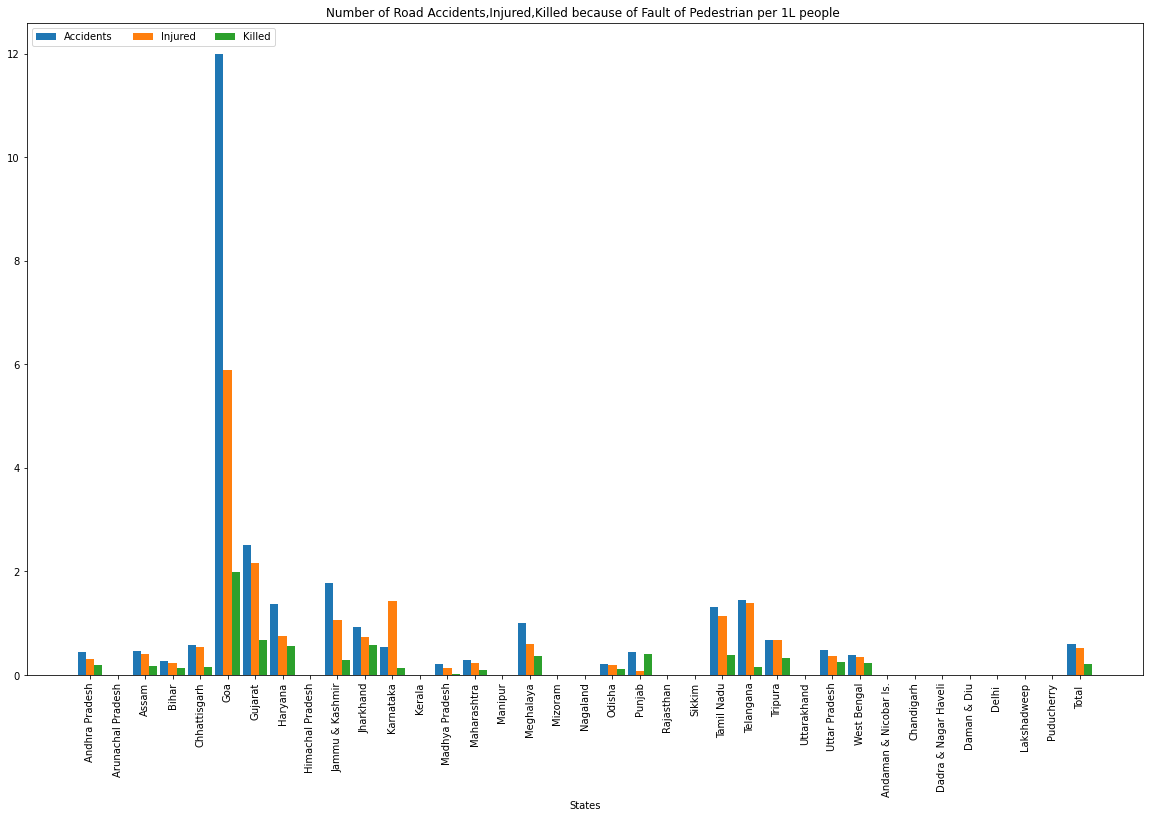

In [42]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Accidents' : np.array(df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people']),
'Injured' : np.array(df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people']),
'Killed' : np.array(df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']),

}

x = np.arange(len(years))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of Road Accidents,Injured,Killed because of Fault of Pedestrian per 1L people ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

**21.	Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the DEFECTS IN THE VEHICLE per 1L people of that state.**

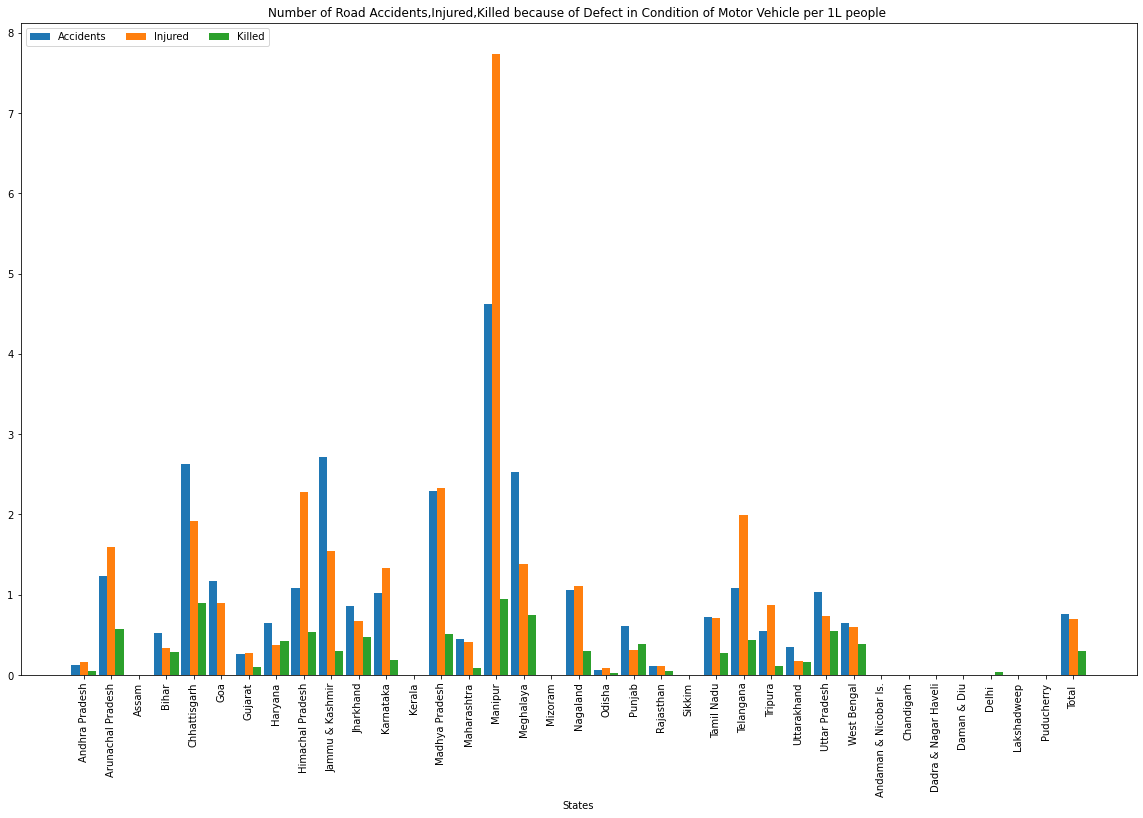

In [43]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Accidents' : np.array(df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people']),
'Injured' : np.array(df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people']),
'Killed' : np.array(df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']),

}

x = np.arange(len(years))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of Road Accidents,Injured,Killed because of Defect in Condition of Motor Vehicle per 1L people ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

**22.	Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to DEFECTS IN THE ROAD CONDITION per 1L people of that state.**

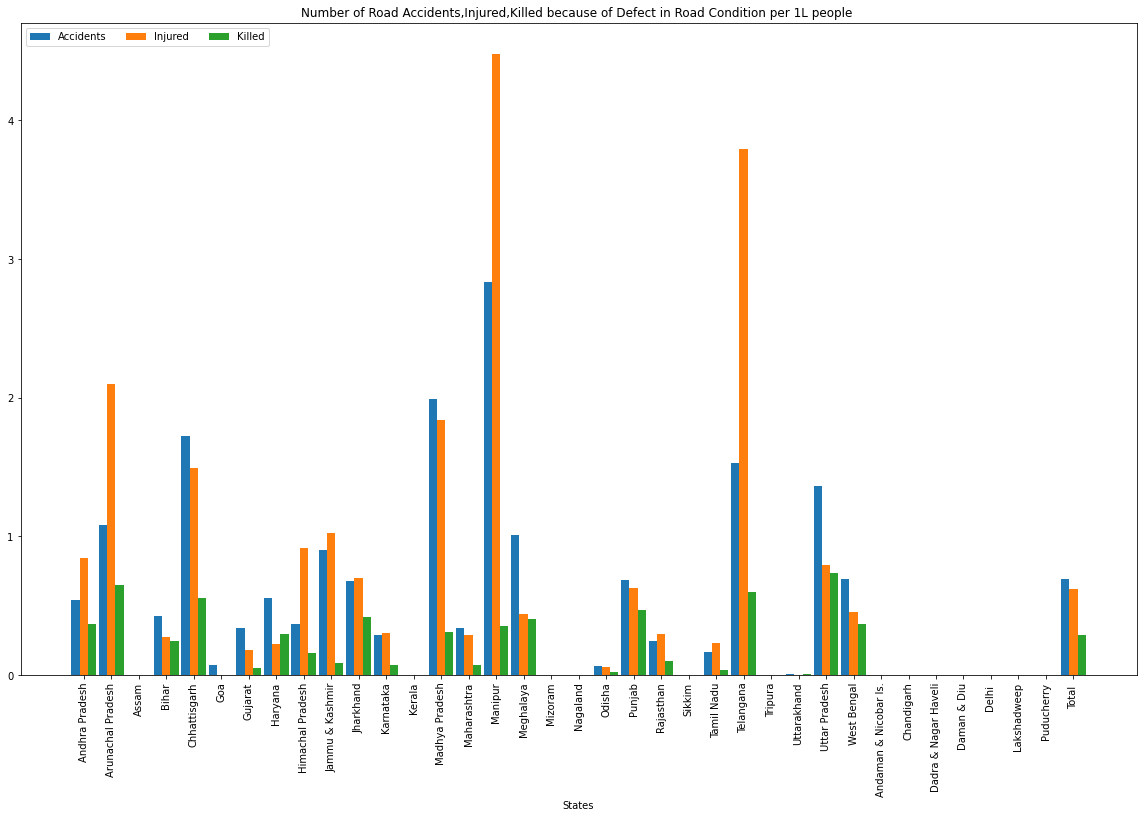

In [44]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Accidents' : np.array(df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people']),
'Injured' : np.array(df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people']),
'Killed' : np.array(df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']),

}

x = np.arange(len(years))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of Road Accidents,Injured,Killed because of Defect in Road Condition per 1L people ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

**23.	Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to WEATHER CONDITION per 1L people of that state.**

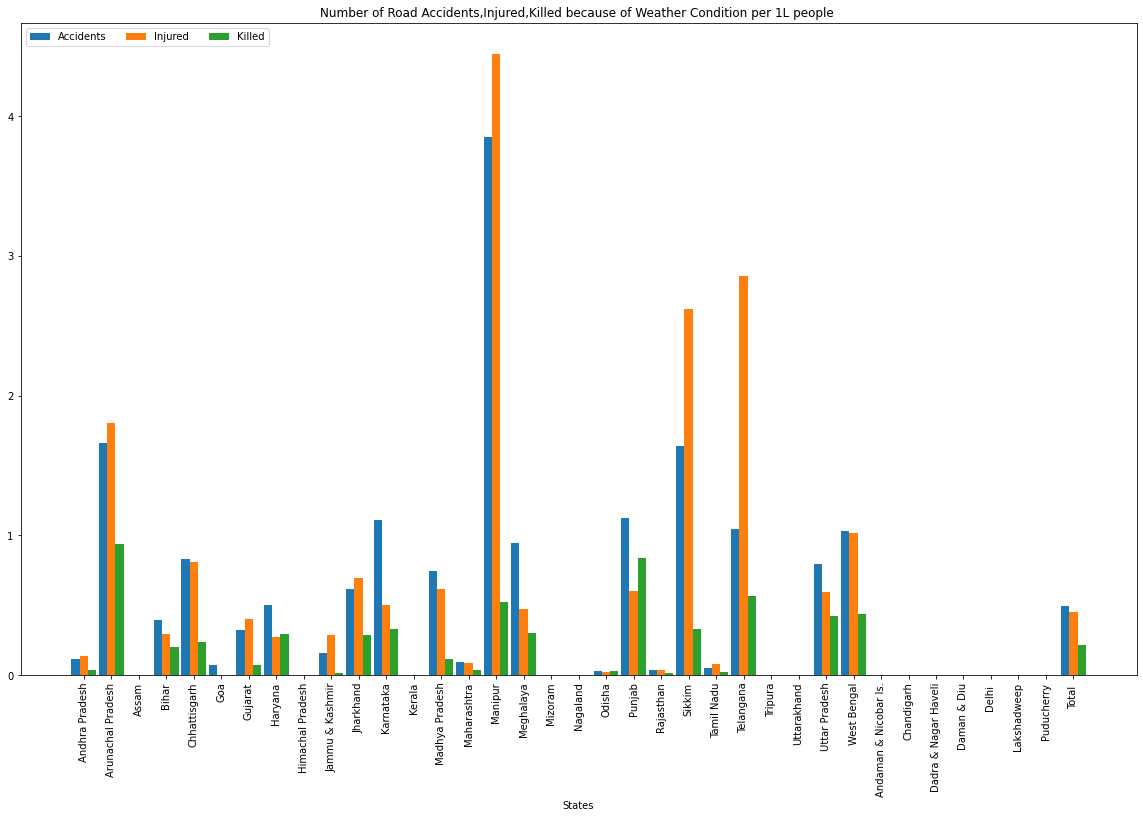

In [45]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Accidents' : np.array(df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people']),
'Injured' : np.array(df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people']),
'Killed' : np.array(df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people']),

}

x = np.arange(len(years))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of Road Accidents,Injured,Killed because of Weather Condition per 1L people ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

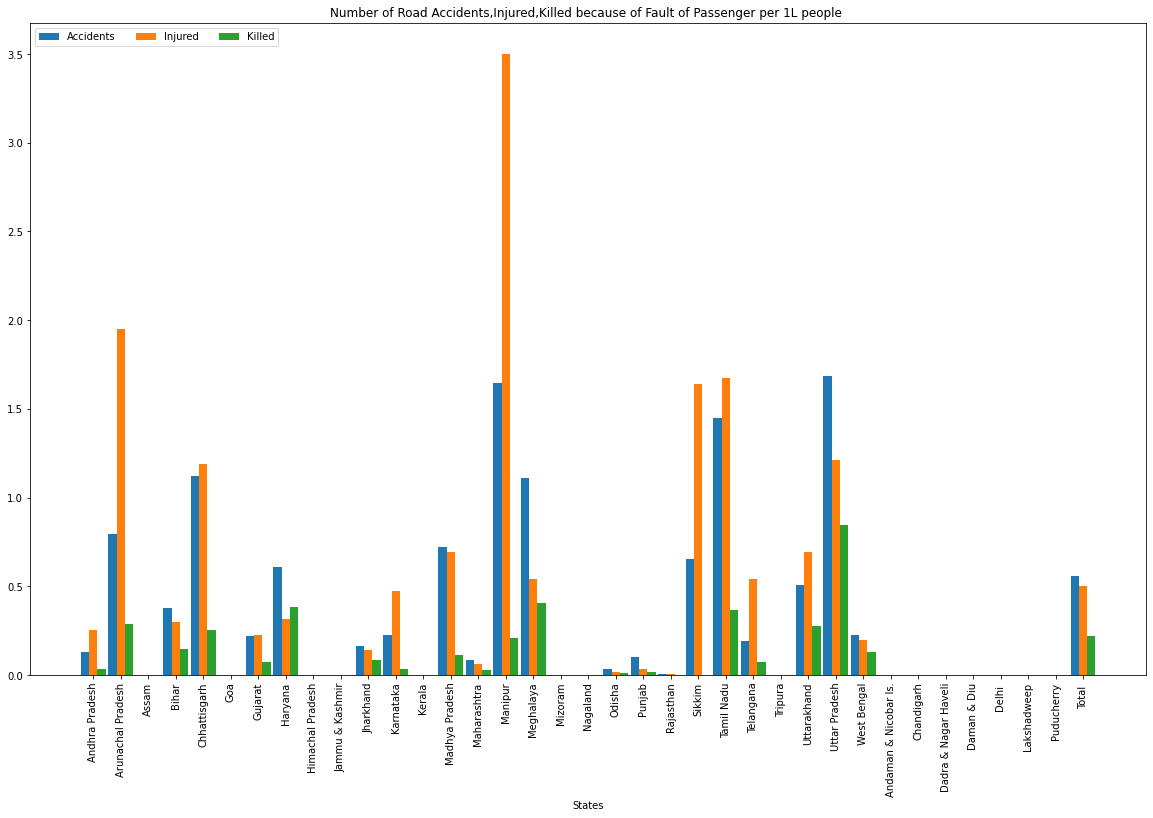

In [46]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Accidents' : np.array(df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people']),
'Injured' : np.array(df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people']),
'Killed' : np.array(df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']),

}

x = np.arange(len(years))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of Road Accidents,Injured,Killed because of Fault of Passenger per 1L people ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

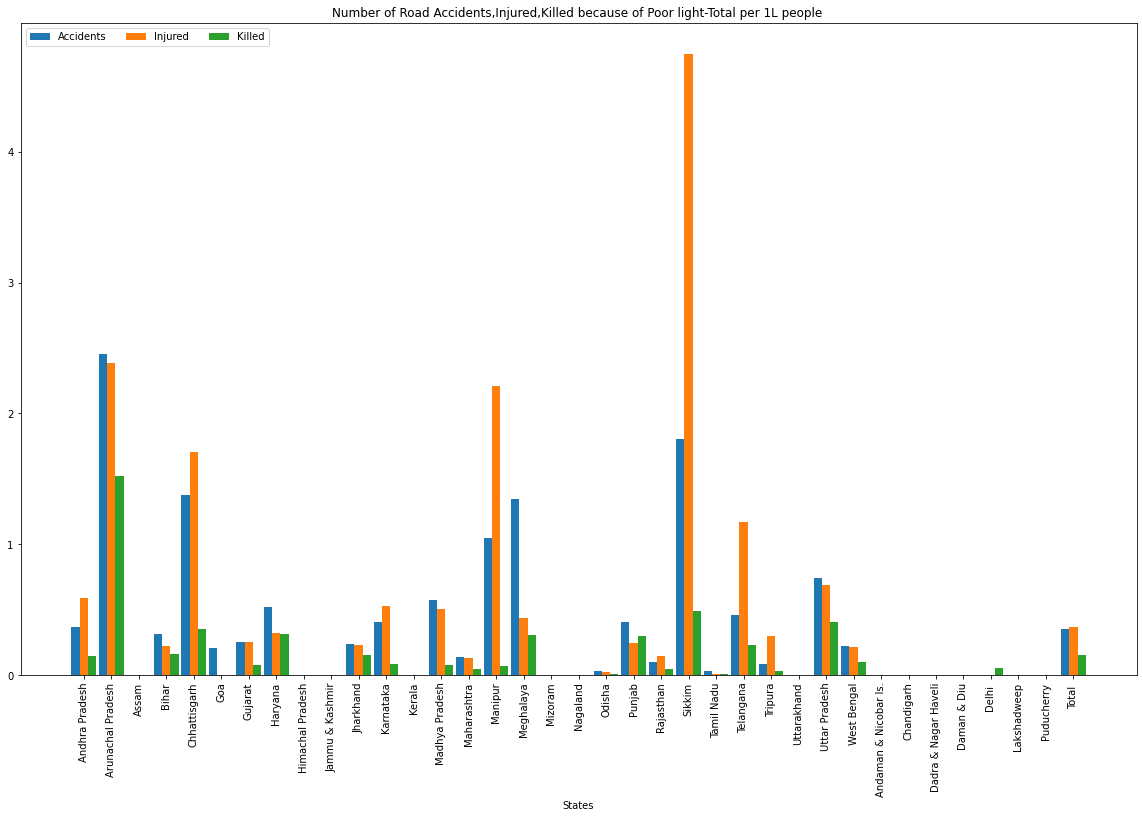

In [47]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Accidents' : np.array(df5['Poor light-Total No. of Road Accidents - 2014 per 1L people']),
'Injured' : np.array(df5['Poor light-Number of Persons-Injured - 2014 per 1L people']),
'Killed' : np.array(df5['Poor light-Number of Persons-Killed - 2014 per 1L people']),

}

x = np.arange(len(years))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of Road Accidents,Injured,Killed because of Poor light-Total per 1L people ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

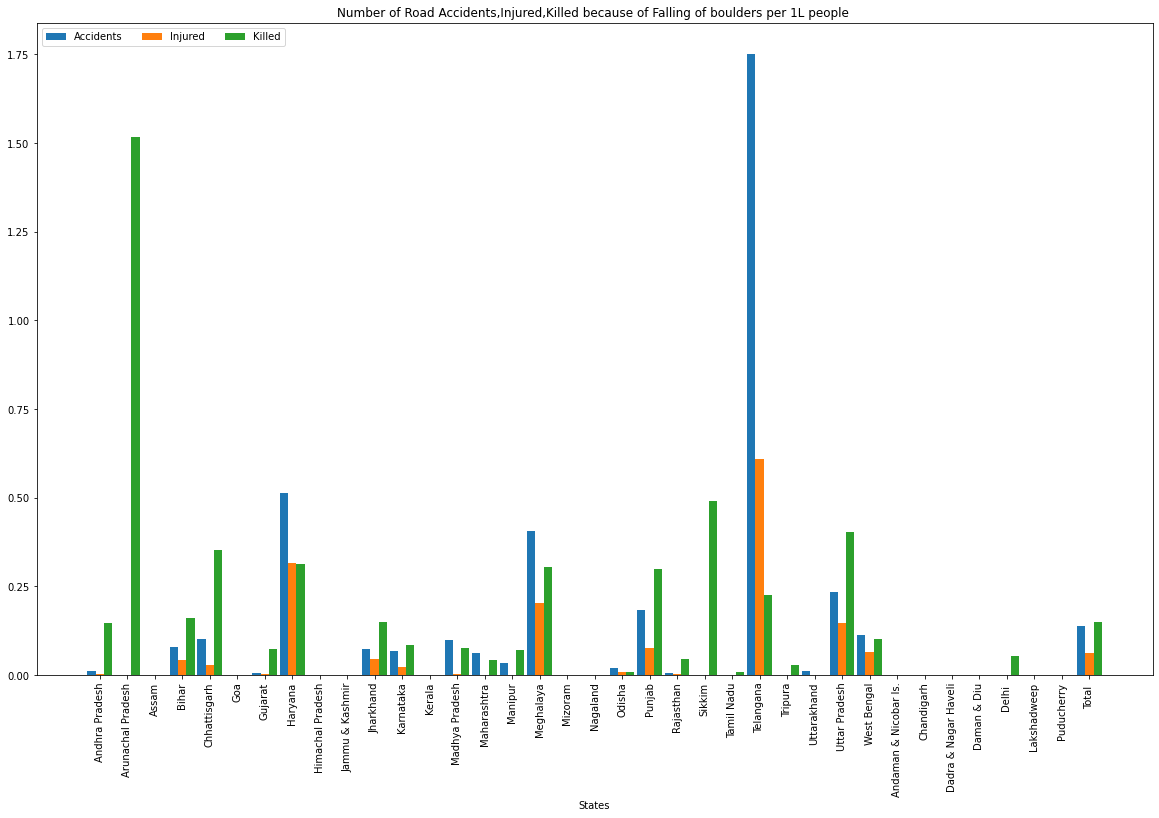

In [48]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Accidents' : np.array(df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people']),
'Injured' : np.array(df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']),
'Killed' : np.array(df5['Poor light-Number of Persons-Killed - 2014 per 1L people']),

}

x = np.arange(len(years))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of Road Accidents,Injured,Killed because of Falling of boulders per 1L people ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

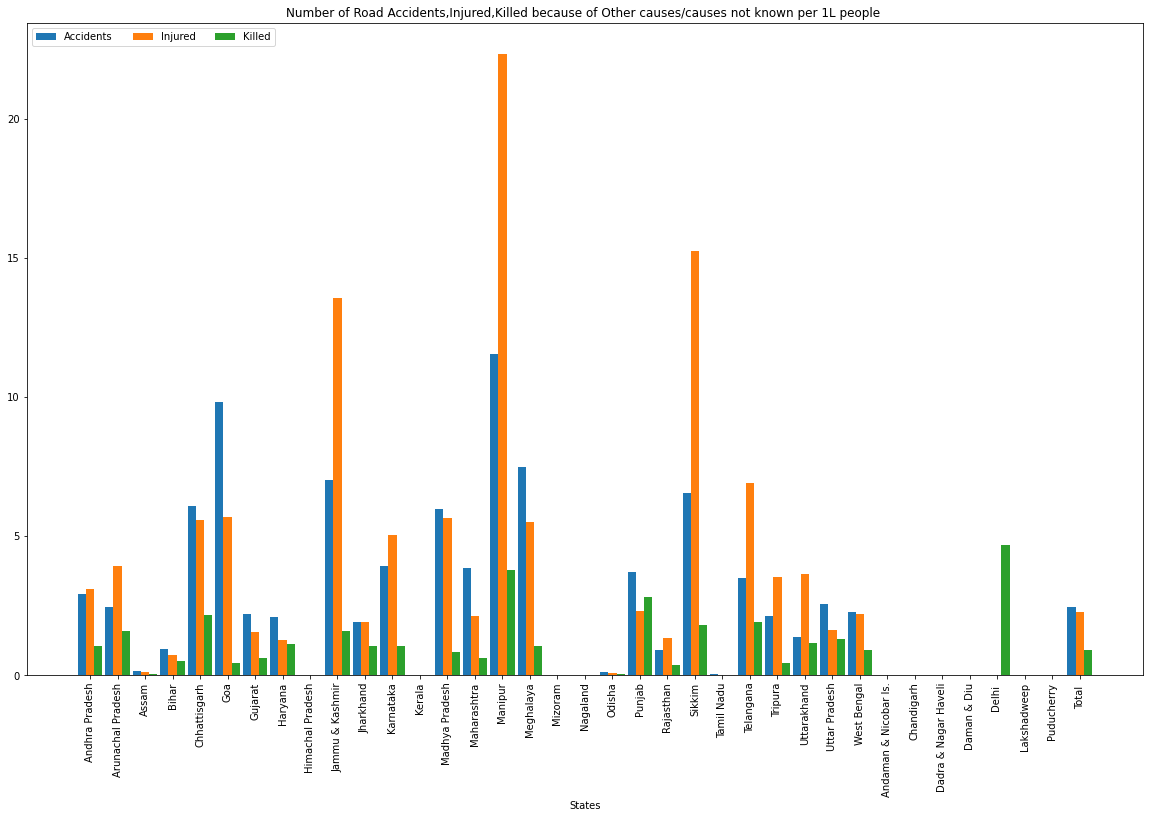

In [49]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Accidents' : np.array(df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people']),
'Injured' : np.array(df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people']),
'Killed' : np.array(df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']),

}

x = np.arange(len(years))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title('Number of Road Accidents,Injured,Killed because of Other causes/causes not known per 1L people ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

In [50]:
df5['Total_Accidents'] = df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'] + df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'] + df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'] + df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'] + df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'] + df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'] + df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people'] + df5['Poor light-Total No. of Road Accidents - 2014 per 1L people'] + df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people'] + df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people']
df5['Total_Killed'] = df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people'] + df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people'] + df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people'] + df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people'] + df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people'] + df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people'] + df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people'] + df5['Poor light-Number of Persons-Killed - 2014 per 1L people'] + df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people'] + df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']
df5['Total_Injured'] = df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'] + df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'] + df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'] + df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'] + df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'] + df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people'] + df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people'] + df5['Poor light-Number of Persons-Injured - 2014 per 1L people'] + df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people'] + df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people']

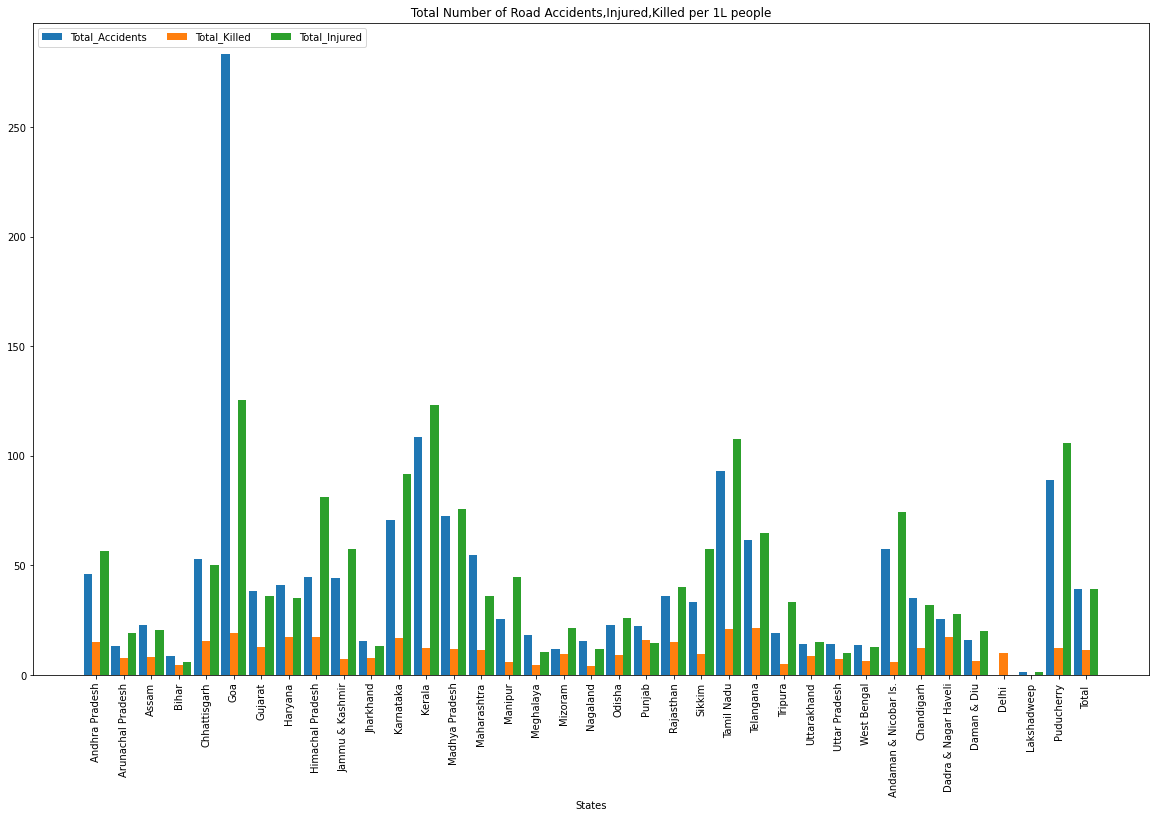

In [51]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Total_Accidents' : np.array(df5['Total_Accidents']),
'Total_Killed' : np.array(df5['Total_Killed']),
'Total_Injured' : np.array(df5['Total_Injured']),

}

x = np.arange(len(years))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title(' Total Number of Road Accidents,Injured,Killed per 1L people ')
ax.set_xticks(x+width,states,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

Displaying typeOfVehicle.csv dataset

In [52]:
df6

,Sl. No.,States/UTs,Two-Wheelers - Number of Road Accidents - Fatal - 2014,Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people,Two-Wheelers - Number of Road Accidents - Total - 2014,Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people,Two-Wheelers - Number of Persons - Killed - 2014,Two-Wheelers - Number of Persons - Killed - 2014 per 1L people,Two-Wheelers - Number of Persons - Injured - 2014,Two-Wheelers - Number of Persons - Injured - 2014 per 1L people,Auto-Rickshaws - Number of Road Accidents - Fatal - 2014,Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people,Auto-Rickshaws - Number of Road Accidents - Total - 2014,Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people,Auto-Rickshaws - Number of Persons - Killed - 2014,Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people,Auto-Rickshaws - Number of Persons - Injured - 2014,Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people,"Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014","Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people","Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014","Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people","Cars, Jeeps,Taxis - Number of Persons - Killed - 2014","Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people","Cars, Jeeps,Taxis - Number of Persons - Injured - 2014","Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people",Buses - Number of Road Accidents - Fatal - 2014,Buses - Number of Road Accidents - Fatal - 2014 per 1L people,Buses - Number of Road Accidents - Total - 2014,Buses - Number of Road Accidents - Total - 2014 per 1L people,Buses - Number of Persons - Killed - 2014,Buses - Number of Persons - Killed - 2014 per 1L people,Buses - Number of Persons - Injured - 2014,Buses - Number of Persons - Injured - 2014 per 1L people,"Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014","Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people","Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014","Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people","Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014","Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people","Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014","Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people",Other Motor Vehicles - Number of Road Accidents - Fatal - 2014,Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people,Other Motor Vehicles - Number of Road Accidents - Total - 2014,Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people,Other Motor Vehicles - Number of Persons - Killed - 2014,Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people,Other Motor Vehicles - Number of Persons - Injured - 2014,Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people,Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014,Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people,Other Vehicles/Objects - Number of Road Accidents - Total - 2014,Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people,Other Vehicles/Objects - Number of Persons - Killed - 2014,Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people,Other Vehicles/Objects - Number of Persons - Injured - 2014,Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people,Population
0,1,Andhra Pradesh,1961,3.741606,7239,13.812077,2003,3.821742,7333,13.991430,950,1.812609,4442,8.475376,977,1.864125,7173,13.686149,889,1.696220,3853,7.351559,911,1.738196,5429,10.358581,550,1.049405,1732,3.304672,567,1.081841,2242,4.277756,1701,3.245523,4324,8.250231,1758,3.354280,5144,9.814799,760,1.450087,1571,2.997482,808,1.541671,1321,2.520

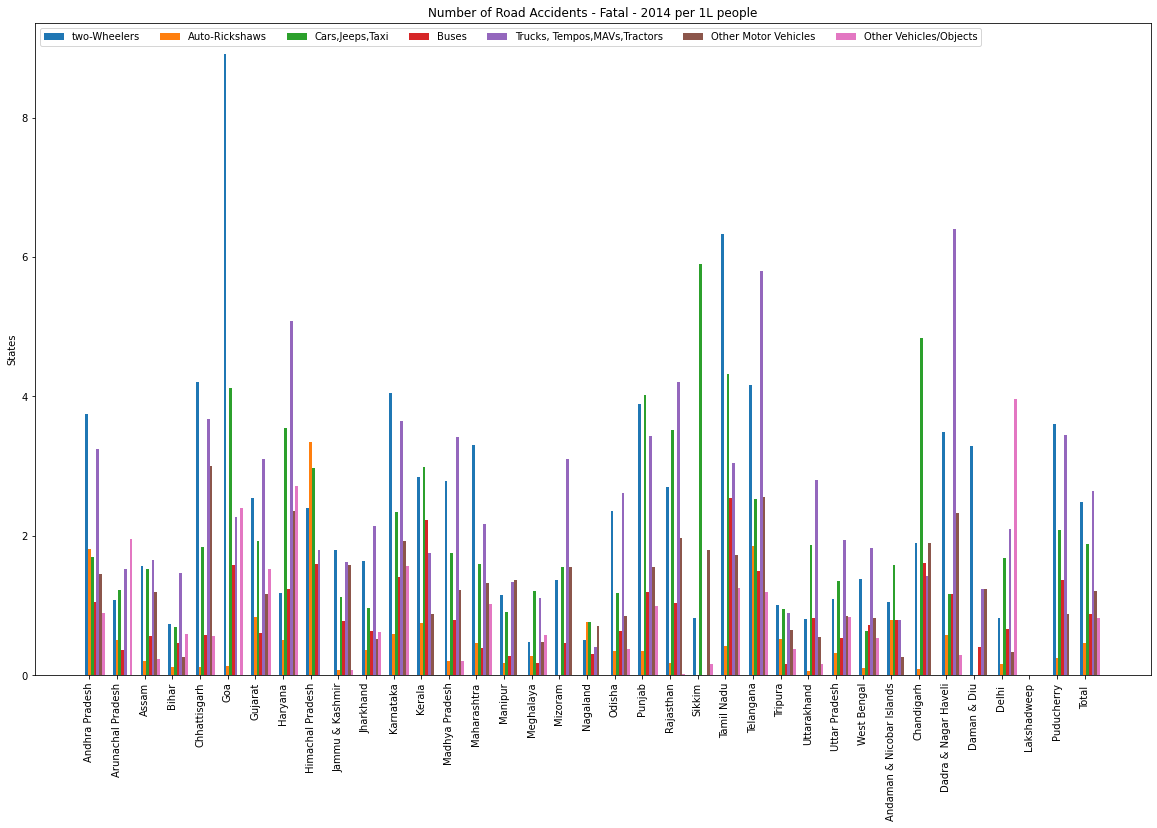

In [53]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df6['States/UTs'])
df5_means = {
'two-Wheelers' : np.array(df6['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Auto-Rickshaws' : np.array(df6['Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Cars,Jeeps,Taxi' : np.array(df6['Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Buses' : np.array(df6['Buses - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Trucks, Tempos,MAVs,Tractors' : np.array(df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Other Motor Vehicles' : np.array(df6['Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Other Vehicles/Objects' : np.array(df6['Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people'])


}

x = np.arange(len(years))  # the label locations
width = 0.1 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title('Number of Road Accidents - Fatal - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)


plt.show()

**24.	Number of Total Accidents for each vehicle type per 1L people of that state.**

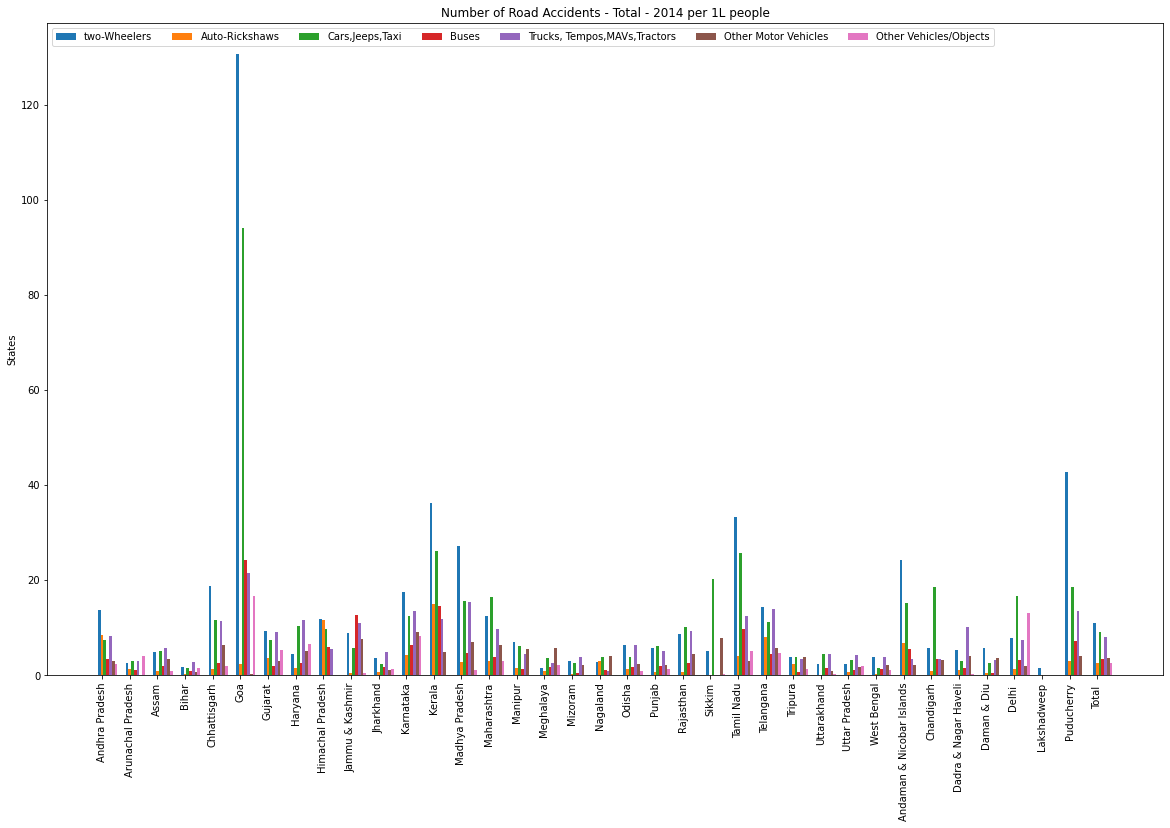

In [54]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df6['States/UTs'])
df5_means = {
'two-Wheelers' : np.array(df6['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people']),
'Auto-Rickshaws' : np.array(df6['Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people']),
'Cars,Jeeps,Taxi' : np.array(df6['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people']),
'Buses' : np.array(df6['Buses - Number of Road Accidents - Total - 2014 per 1L people']),
'Trucks, Tempos,MAVs,Tractors' : np.array(df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people']),
'Other Motor Vehicles' : np.array(df6['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people']),
'Other Vehicles/Objects' : np.array(df6['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people'])


}

x = np.arange(len(years))  # the label locations
width = 0.1 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title('Number of Road Accidents - Total - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

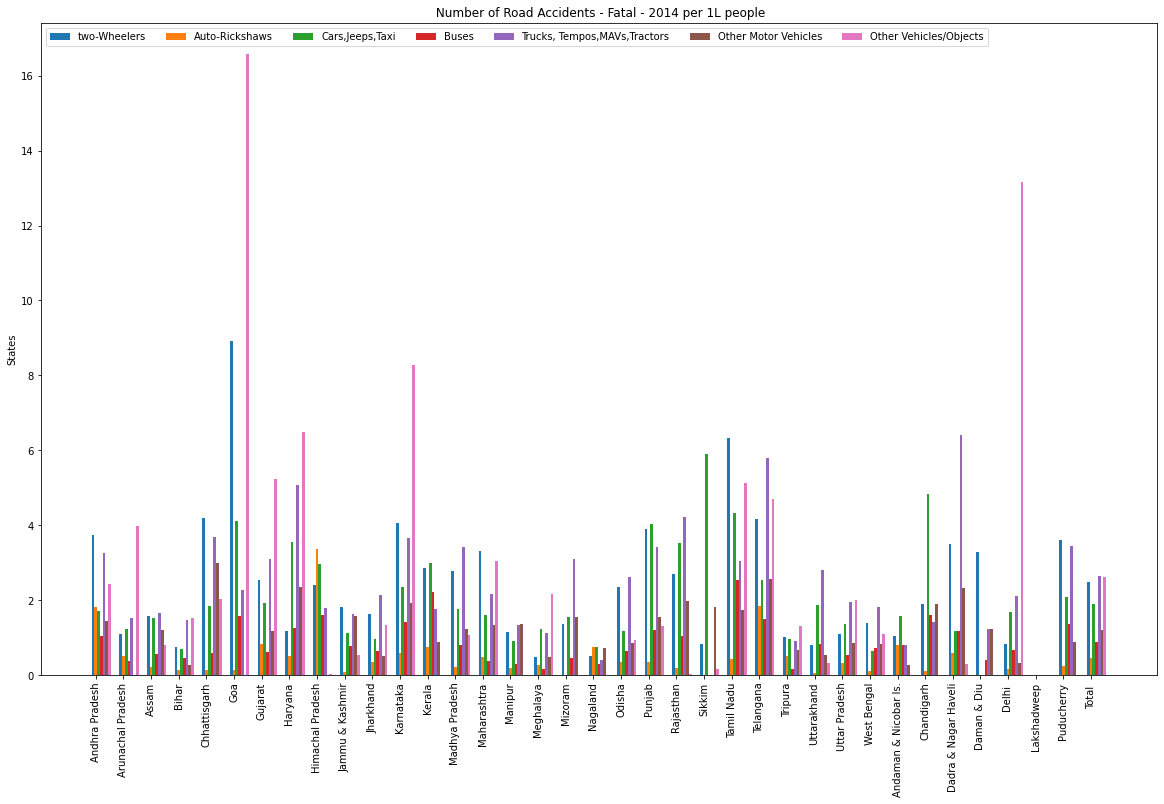

In [55]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'two-Wheelers' : np.array(df6['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Auto-Rickshaws' : np.array(df6['Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Cars,Jeeps,Taxi' : np.array(df6['Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Buses' : np.array(df6['Buses - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Trucks, Tempos,MAVs,Tractors' : np.array(df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Other Motor Vehicles' : np.array(df6['Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people']),
'Other Vehicles/Objects' : np.array(df6['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people'])


}

x = np.arange(len(years))  # the label locations
width = 0.1 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title(' Number of Road Accidents - Fatal - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

25.	Number of Persons Killed for each vehicle type per 1L people of that state.

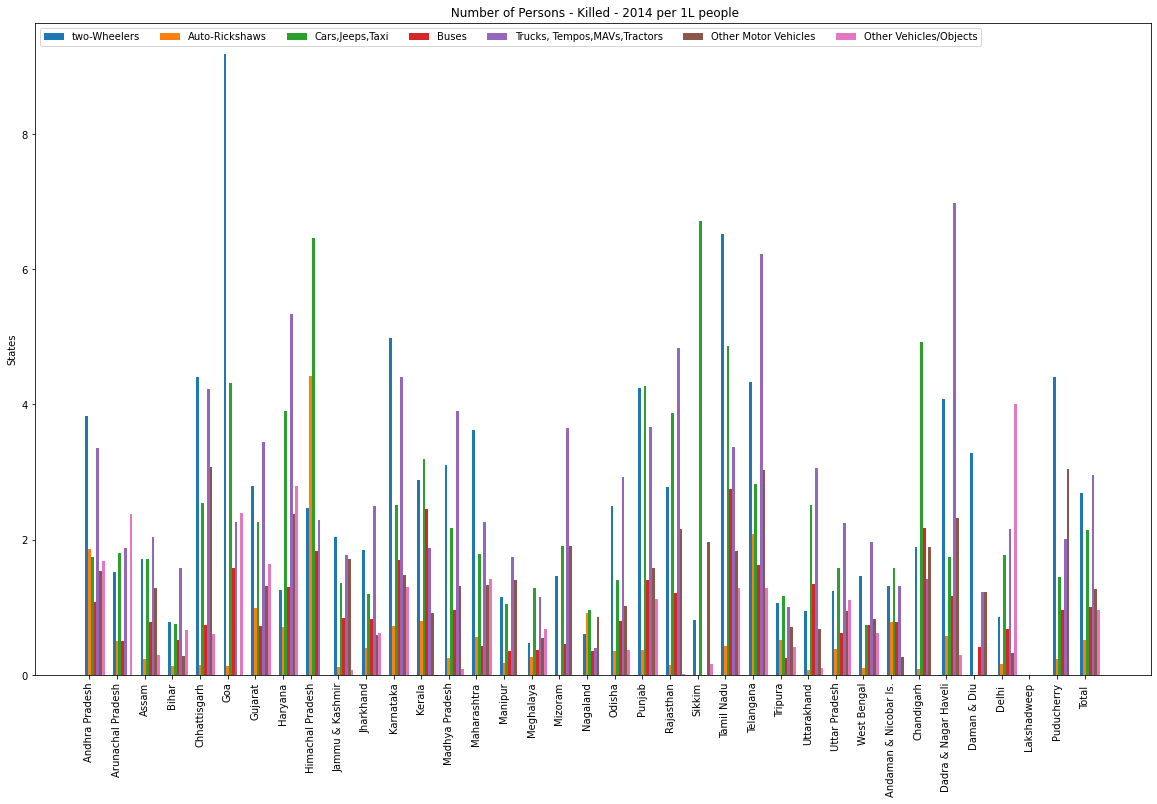

In [56]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'two-Wheelers' : np.array(df6['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people']),
'Auto-Rickshaws' : np.array(df6['Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people']),
'Cars,Jeeps,Taxi' : np.array(df6['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people']),
'Buses' : np.array(df6['Buses - Number of Persons - Killed - 2014 per 1L people']),
'Trucks, Tempos,MAVs,Tractors' : np.array(df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people']),
'Other Motor Vehicles' : np.array(df6['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people']),
'Other Vehicles/Objects' : np.array(df6['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people'])


}

x = np.arange(len(years))  # the label locations
width = 0.1 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title(' Number of Persons - Killed - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

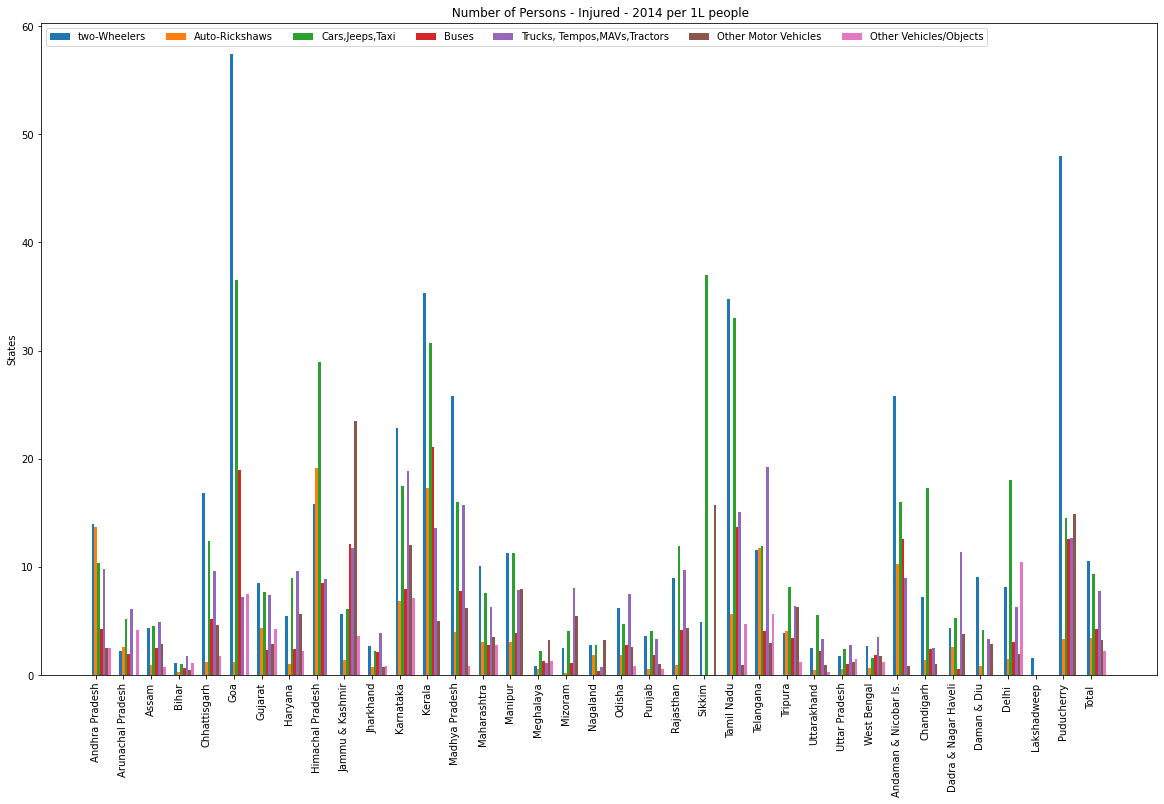

In [57]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'two-Wheelers' : np.array(df6['Two-Wheelers - Number of Persons - Injured - 2014 per 1L people']),
'Auto-Rickshaws' : np.array(df6['Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people']),
'Cars,Jeeps,Taxi' : np.array(df6['Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people']),
'Buses' : np.array(df6['Buses - Number of Persons - Injured - 2014 per 1L people']),
'Trucks, Tempos,MAVs,Tractors' : np.array(df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people']),
'Other Motor Vehicles' : np.array(df6['Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people']),
'Other Vehicles/Objects' : np.array(df6['Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people'])


}

x = np.arange(len(years))  # the label locations
width = 0.1 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title(' Number of Persons - Injured - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

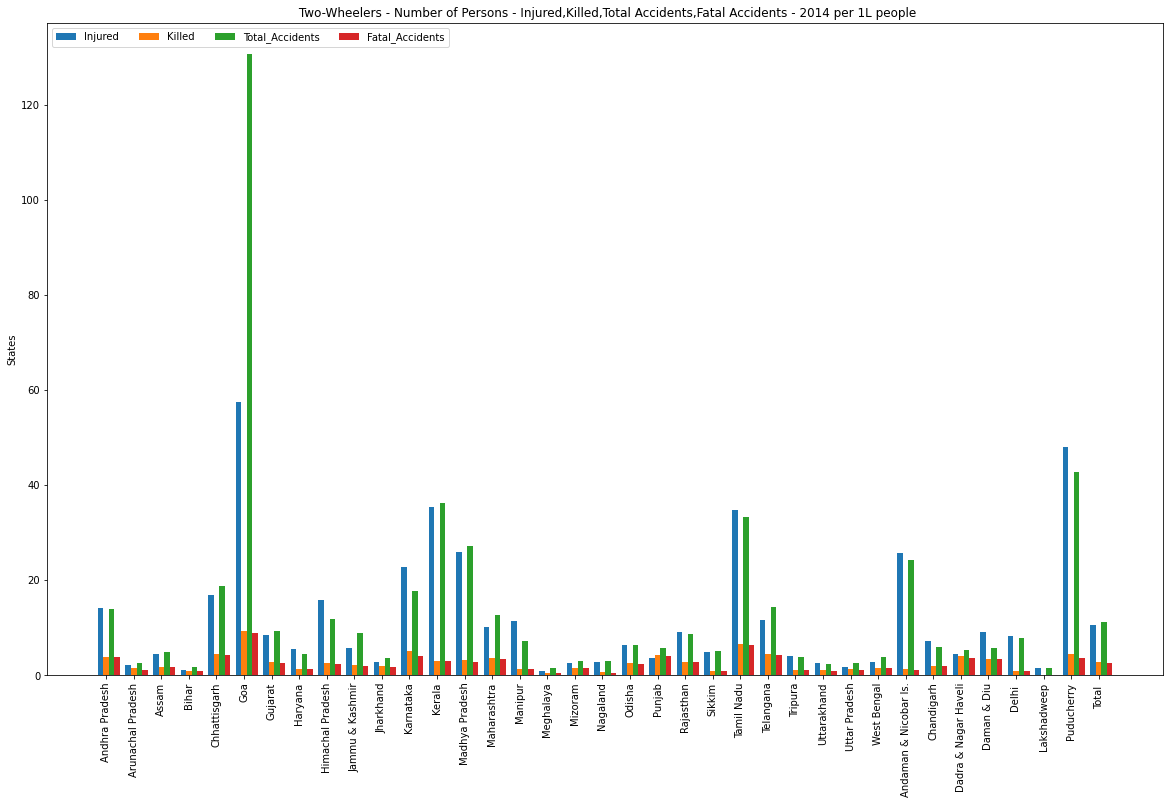

In [58]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Injured' : np.array(df6['Two-Wheelers - Number of Persons - Injured - 2014 per 1L people']),
'Killed' : np.array(df6['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people']),
'Total_Accidents' : np.array(df6['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people']),
'Fatal_Accidents' : np.array(df6['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people']),



}

x = np.arange(len(years))  # the label locations
width = 0.20 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title(' Two-Wheelers - Number of Persons - Injured,Killed,Total Accidents,Fatal Accidents - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)


plt.show()

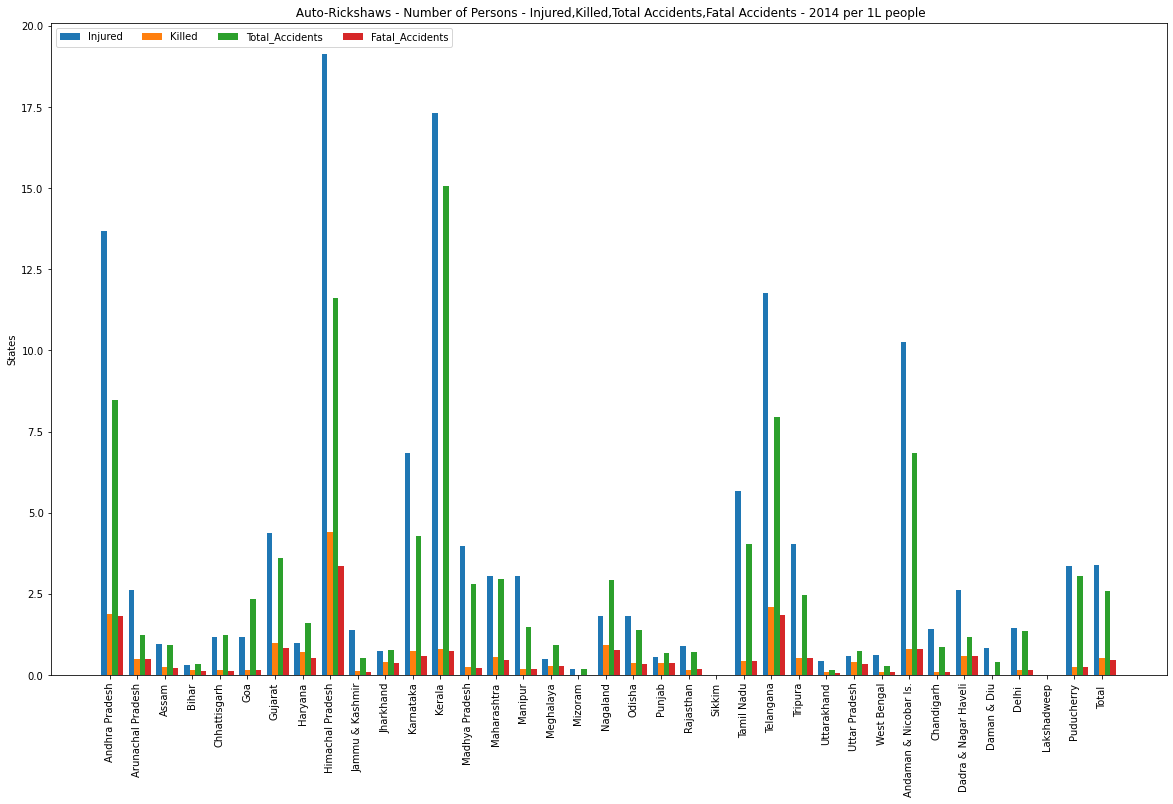

In [59]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Injured' : np.array(df6['Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people']),
'Killed' : np.array(df6['Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people']),
'Total_Accidents' : np.array(df6['Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people']),
'Fatal_Accidents' : np.array(df6['Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people']),



}

x = np.arange(len(years))  # the label locations
width = 0.20 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title(' Auto-Rickshaws - Number of Persons - Injured,Killed,Total Accidents,Fatal Accidents - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)


plt.show()

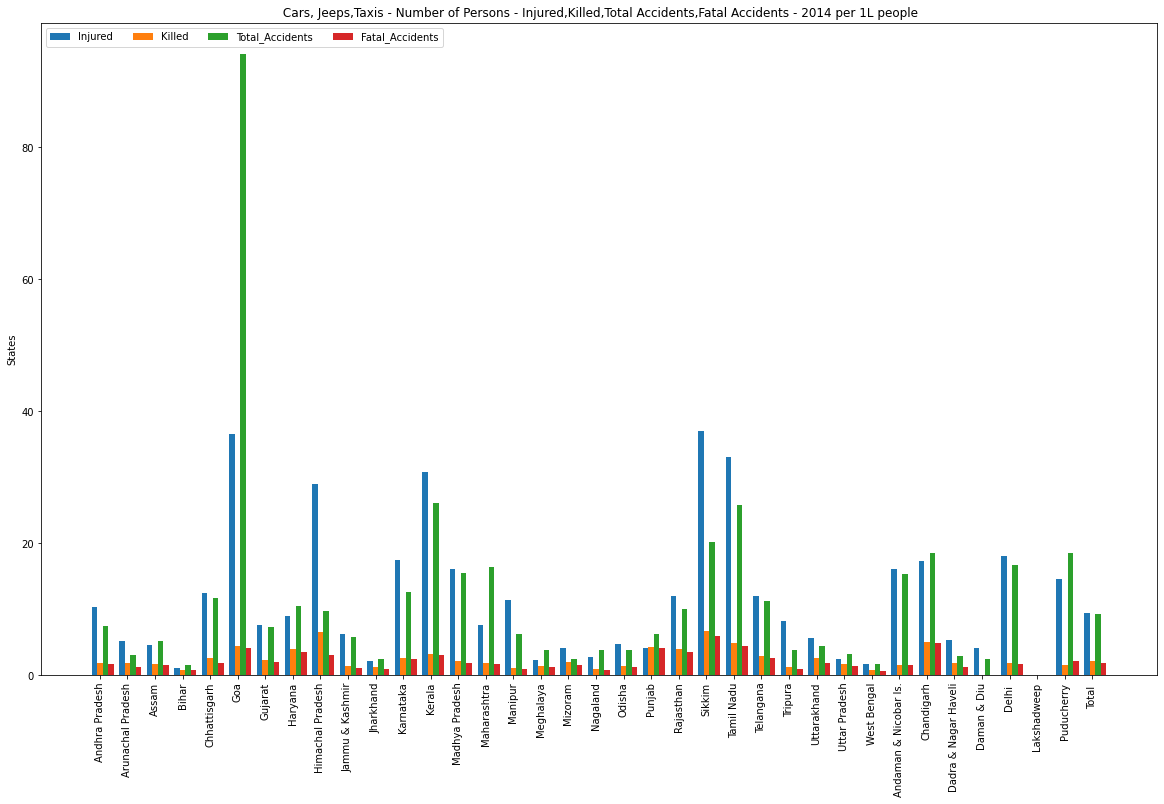

In [60]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Injured' : np.array(df6['Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people']),
'Killed' : np.array(df6['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people']),
'Total_Accidents' : np.array(df6['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people']),
'Fatal_Accidents' : np.array(df6['Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people']),



}

x = np.arange(len(years))  # the label locations
width = 0.20 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title(' Cars, Jeeps,Taxis - Number of Persons - Injured,Killed,Total Accidents,Fatal Accidents - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

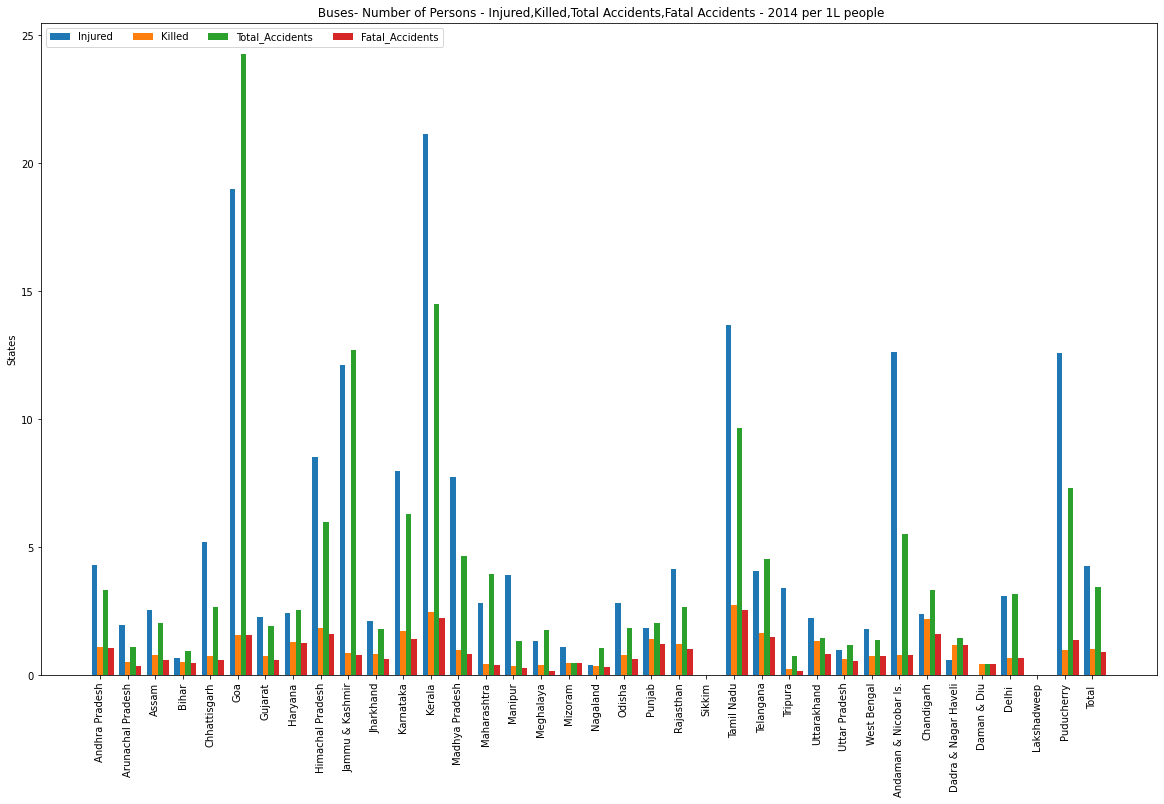

In [61]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Injured' : np.array(df6['Buses - Number of Persons - Injured - 2014 per 1L people']),
'Killed' : np.array(df6['Buses - Number of Persons - Killed - 2014 per 1L people']),
'Total_Accidents' : np.array(df6['Buses - Number of Road Accidents - Total - 2014 per 1L people']),
'Fatal_Accidents' : np.array(df6['Buses - Number of Road Accidents - Fatal - 2014 per 1L people']),



}

x = np.arange(len(years))  # the label locations
width = 0.20 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title(' Buses- Number of Persons - Injured,Killed,Total Accidents,Fatal Accidents - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

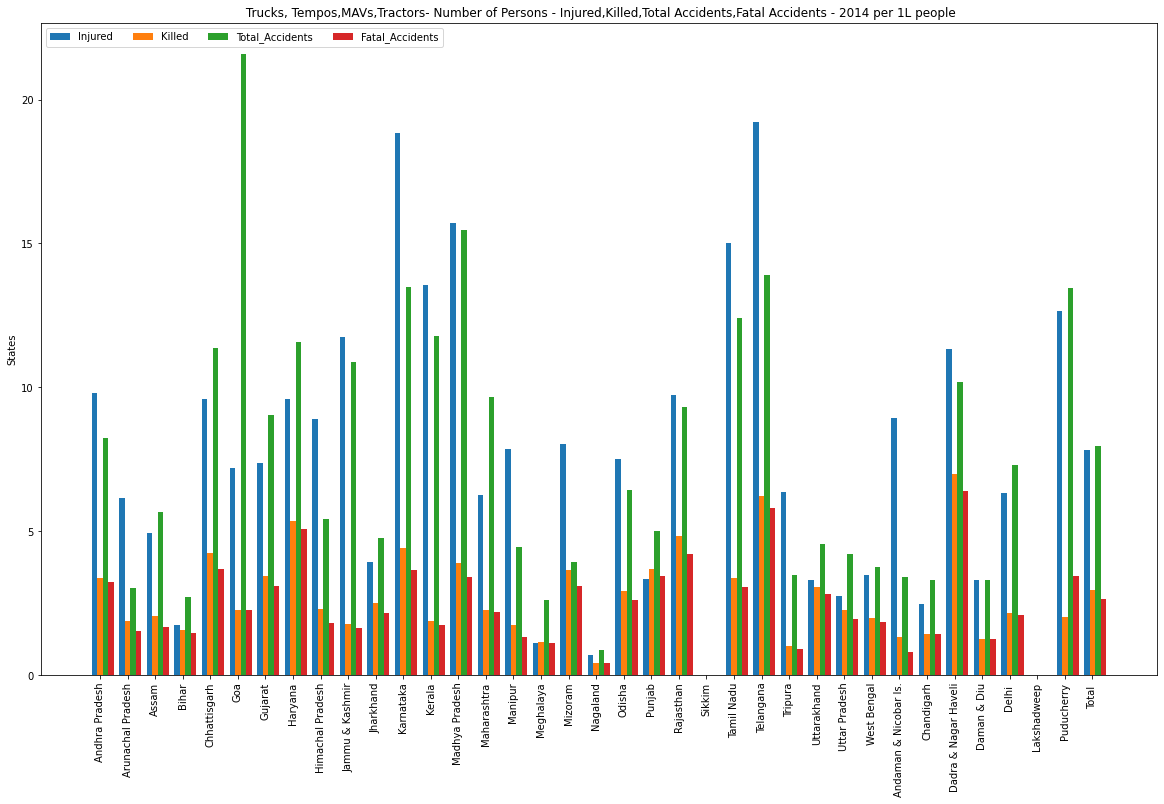

In [62]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Injured' : np.array(df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people']),
'Killed' : np.array(df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people']),
'Total_Accidents' : np.array(df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people']),
'Fatal_Accidents' : np.array(df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people']),



}

x = np.arange(len(years))  # the label locations
width = 0.20 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title(' Trucks, Tempos,MAVs,Tractors- Number of Persons - Injured,Killed,Total Accidents,Fatal Accidents - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

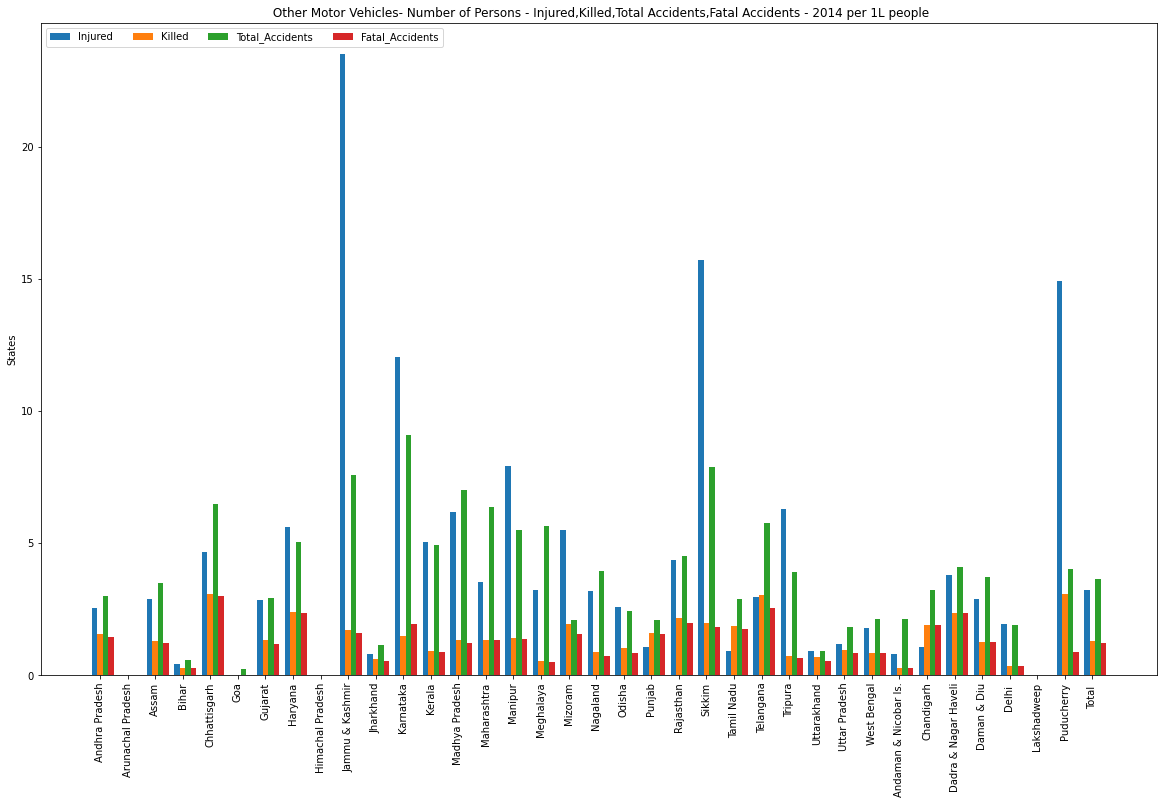

In [63]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Injured' : np.array(df6['Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people']),
'Killed' : np.array(df6['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people']),
'Total_Accidents' : np.array(df6['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people']),
'Fatal_Accidents' : np.array(df6['Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people']),



}

x = np.arange(len(years))  # the label locations
width = 0.20 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title(' Other Motor Vehicles- Number of Persons - Injured,Killed,Total Accidents,Fatal Accidents - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

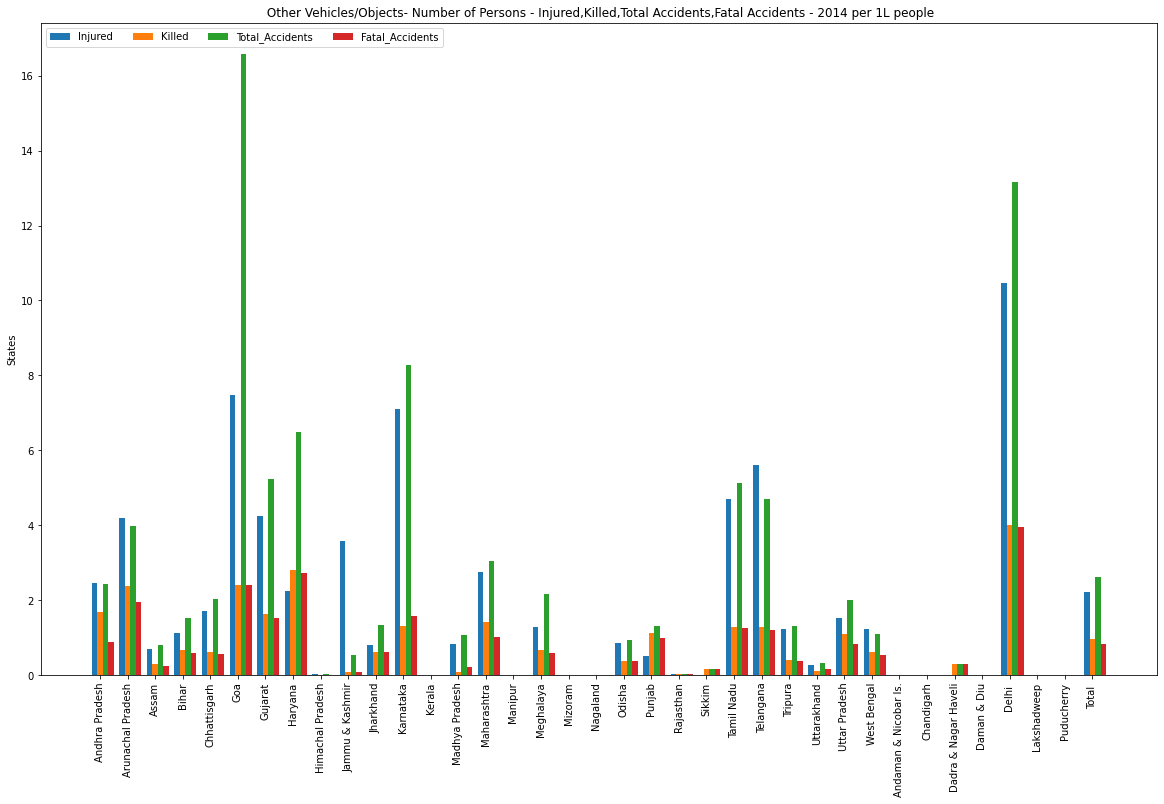

In [64]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Injured' : np.array(df6['Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people']),
'Killed' : np.array(df6['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people']),
'Total_Accidents' : np.array(df6['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people']),
'Fatal_Accidents' : np.array(df6['Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people']),



}

x = np.arange(len(years))  # the label locations
width = 0.20 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('States')
ax.set_title(' Other Vehicles/Objects- Number of Persons - Injured,Killed,Total Accidents,Fatal Accidents - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

26.	Total accidents, fatal accidents, killed and injured for each state per 1L people of that state.

In [65]:
df6['Total_Injured'] = df6['Two-Wheelers - Number of Persons - Injured - 2014 per 1L people'] + df6['Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people'] + df6['Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people'] + df6['Buses - Number of Persons - Injured - 2014 per 1L people'] + df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people'] + df6['Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people'] + df6['Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people']
df6['Total_Killed'] = df6['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people'] + df6['Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people'] + df6['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people'] + df6['Buses - Number of Persons - Killed - 2014 per 1L people'] + df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people'] + df6['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people'] + df6['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people']
df6['Total_Accidents'] = df6['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people'] + df6['Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people'] + df6['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people'] + df6['Buses - Number of Road Accidents - Total - 2014 per 1L people'] + df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people'] + df6['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people'] + df6['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people']
df6['Total_Fatal_Accidents'] = df6['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people'] + df6['Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people'] + df6['Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people'] + df6['Buses - Number of Road Accidents - Fatal - 2014 per 1L people'] + df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people'] + df6['Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people'] + df6['Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people']

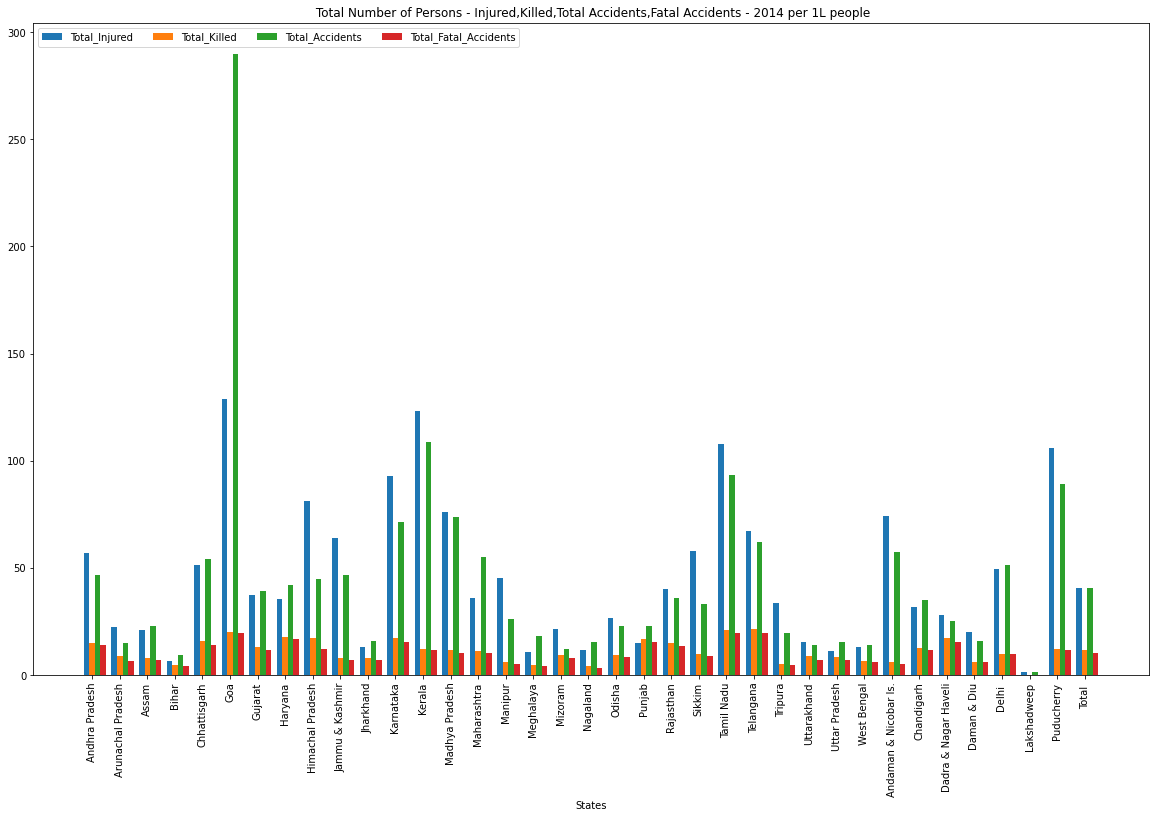

In [66]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array(df5['States/UTs'])
df5_means = {
'Total_Injured' : np.array(df6['Total_Injured']),
'Total_Killed' : np.array(df6['Total_Killed']),
'Total_Accidents' : np.array(df6['Total_Accidents']),
'Total_Fatal_Accidents' : np.array(df6['Total_Fatal_Accidents']),



}

x = np.arange(len(years))  # the label locations
width = 0.20 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20,12))

for attribute, measurement in df5_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_title(' Total Number of Persons - Injured,Killed,Total Accidents,Fatal Accidents - 2014 per 1L people')
ax.set_xticks(x + width, years,rotation=90)
ax.legend(loc='upper left', ncols=10)

plt.show()

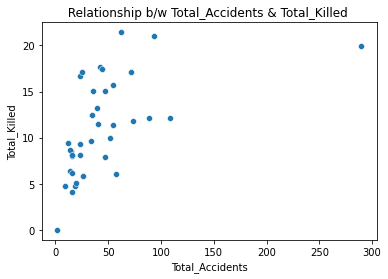

In [67]:
fig, ax = plt.subplots()
sns.scatterplot(x=df6['Total_Accidents'],y=df6['Total_Killed'])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Total_Accidents')
ax.set_ylabel('Total_Killed')
ax.set_title(' Relationship b/w Total_Accidents & Total_Killed  ')
plt.show()

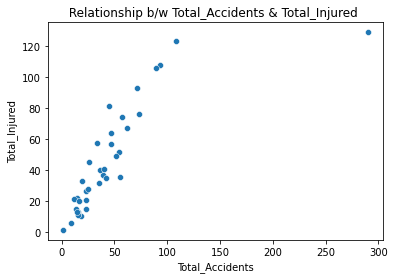

In [68]:
fig, ax = plt.subplots()
sns.scatterplot(x=df6['Total_Accidents'],y=df6['Total_Injured'])
ax.set_xlabel('Total_Accidents')
ax.set_ylabel('Total_Injured')
ax.set_title(' Relationship b/w Total_Accidents & Total_Injured  ')
plt.show()

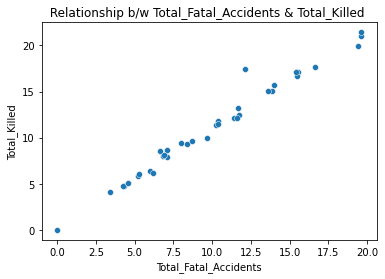

In [69]:
fig, ax = plt.subplots()
sns.scatterplot(x=df6['Total_Fatal_Accidents'],y=df6['Total_Killed'])
ax.set_xlabel('Total_Fatal_Accidents')
ax.set_ylabel('Total_Killed')
ax.set_title(' Relationship b/w Total_Fatal_Accidents & Total_Killed  ')
plt.show()

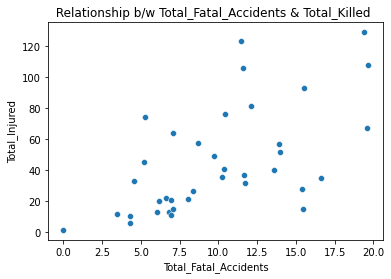

In [70]:
fig, ax = plt.subplots()
sns.scatterplot(x=df6['Total_Fatal_Accidents'],y=df6['Total_Injured'])
ax.set_xlabel('Total_Fatal_Accidents')
ax.set_ylabel('Total_Injured')
ax.set_title(' Relationship b/w Total_Fatal_Accidents & Total_Killed  ')
plt.show()

Loading timeOfOccurence.csv Dataset

In [71]:
df7

,S. No.,States/Uts,06-900hrs - Day - 2014,09-1200hrs - Day - 2014,12-1500hrs - Day - 2014,15-1800hrs - Day - 2014,18-2100hrs - Night - 2014,21-2400hrs - Night - 2014,00-300hrs - Night - 2014,03-600hrs - Night - 2014,Total Accidents - 2014,06-900hrs - (Day) - 2016,09-1200hrs - (Day) - 2016,12-1500hrs - (Day) - 2016,15-1800hrs - (Day) - 2016,18-2100hrs - (Night) - 2016,21-2400hrs - (Night) - 2016,00-300hrs - (Night) - 2016,03-600hrs - (Night) - 2016,Total Accidents - 2016
0,1,Andhra Pradesh,2548,3448,3491,3606,4058,2989,2031,2269,24440,2707,3516,3617,4348,4742,2774,1461,1723,24888
1,2,Arunachal Pradesh,43,30,28,20,16,23,19,26,205,50,37,33,38,25,20,19,27,249
2,3,Assam,1034,1633,1092,1456,979,416,308,226,7144,940,1354,1280,1219,1114,683,378,467,7435
3,4,Bihar,1433,1661,1484,1485,1092,823,677,901,9556,1169,1431,1268,1244,1073,689,466,882,8222
4,5,Chhattisgarh,1677,2316,2064,2550,2256,1394,755,809,13821,1592,2269,2221,2441,2657,1242,619,539,13580
5,6,Goa,381,681,711,818,803,485,214,136,4229,402,686,732,797,861,451,237,138,4304
6,7,Gujarat,2707,3732,3547,3911,3987,2643,1471,1714,23712,2357,3412,3347,3743,4106,2455,1281,1158,21859
7,8,Haryana,1199,1414,1458,1687,1690,1324,948,956,10676,1314,1469,1614,1737,2010,1305,896,889,11234
8,9,Himachal Pradesh,285,465,526,675,585,269,128,125,3058,301,462,492,612,687,341,146,127,3168
9,10,Jammu & Kashmir,477,1098,1328,1162,878,401,281,236,5861,401,904,1216,1511,794,358,147,170,5501


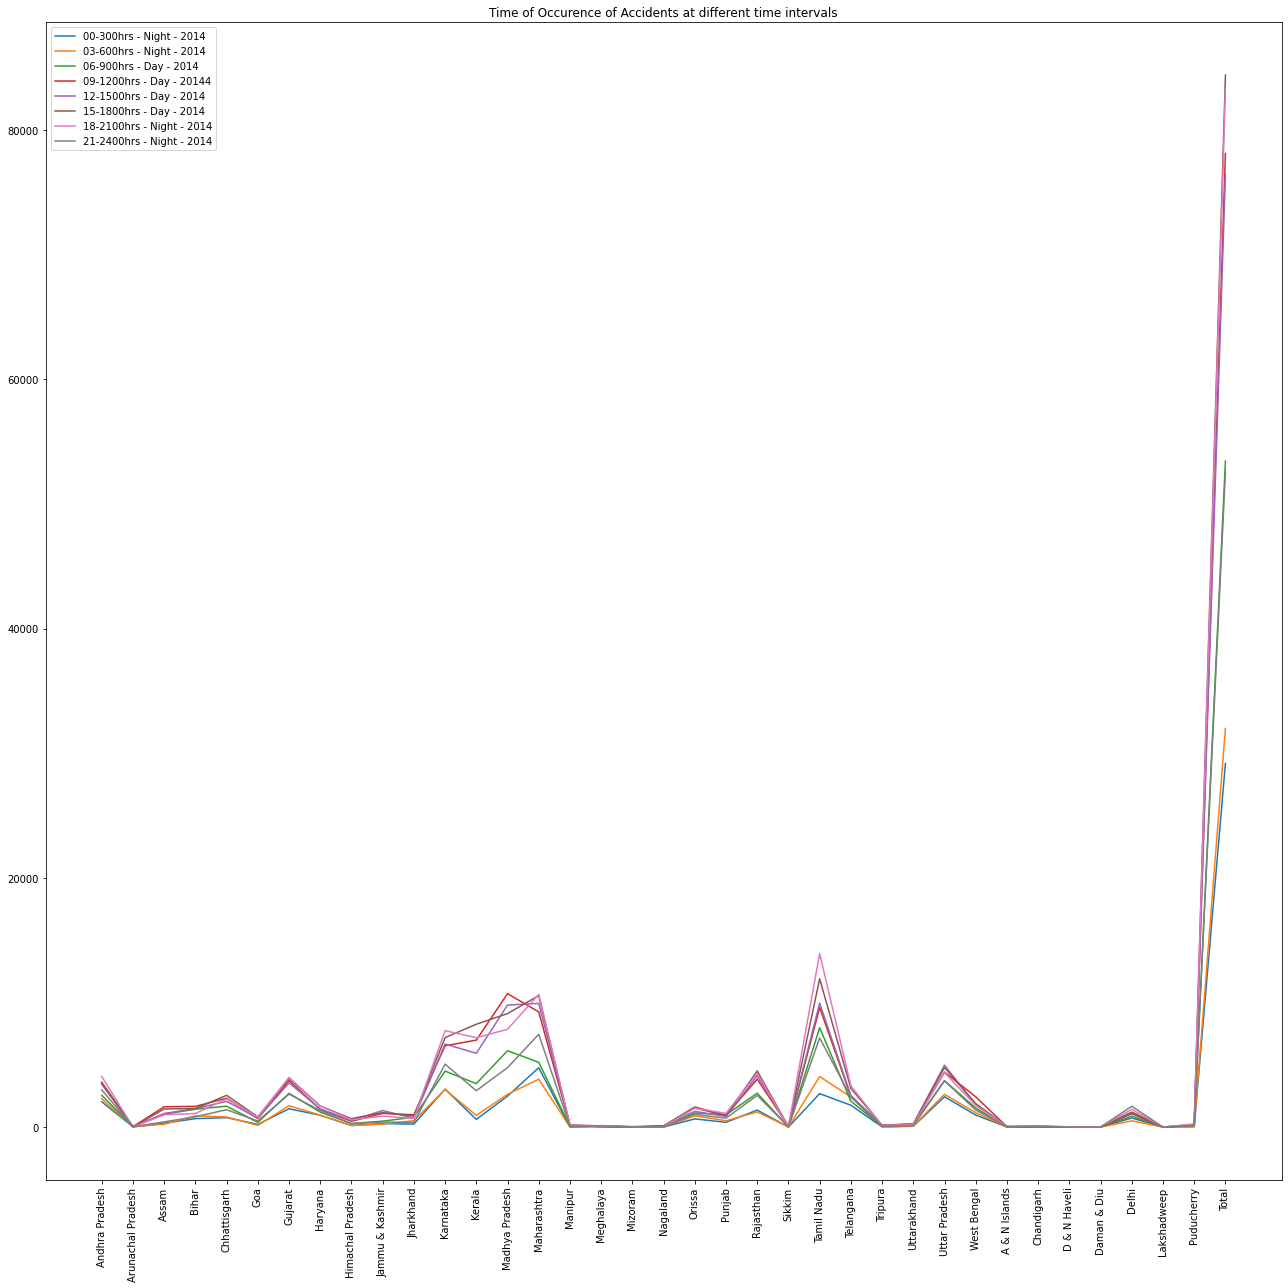

In [72]:
states = np.array(df7['States/Uts'])
#y-axis
a = np.array(df7['00-300hrs - Night - 2014'])
b = np.array(df7['03-600hrs - Night - 2014'])
c = np.array(df7['06-900hrs - Day - 2014'])
d = np.array(df7['09-1200hrs - Day - 2014'])
e = np.array(df7['12-1500hrs - Day - 2014'])
f = np.array(df7['15-1800hrs - Day - 2014'])
g = np.array(df7['18-2100hrs - Night - 2014'])
h = np.array(df7['21-2400hrs - Night - 2014'])

fig, ax = plt.subplots(figsize=(18,18))
plt.plot(a,label='00-300hrs - Night - 2014')
plt.plot(b,label='03-600hrs - Night - 2014')
plt.plot(c,label='06-900hrs - Day - 2014')
plt.plot(d,label='09-1200hrs - Day - 20144')
plt.plot(e,label='12-1500hrs - Day - 2014')
plt.plot(f,label='15-1800hrs - Day - 2014')
plt.plot(g,label='18-2100hrs - Night - 2014')
plt.plot(h,label='21-2400hrs - Night - 2014')

#ax.set_xlabel('Year')
ax.set_title('Time of Occurence of Accidents at different time intervals')
ax.set_xticks(x,states,rotation=90)
ax.legend()



fig.tight_layout()

plt.show()

**27.	Number of Accidents happening in DAY and NIGHT TIME for 2014 and 2016.**

In [73]:
df7['daytime'] = df7['06-900hrs - Day - 2014'] + df7['09-1200hrs - Day - 2014'] + df7['12-1500hrs - Day - 2014'] + df7['15-1800hrs - Day - 2014'] + df7['06-900hrs - (Day) - 2016'] + df7['09-1200hrs - (Day) - 2016'] + df7['12-1500hrs - (Day) - 2016'] + df7['15-1800hrs - (Day) - 2016']
df7['Nighttime'] = df7['18-2100hrs - Night - 2014'] + df7['21-2400hrs - Night - 2014'] + df7['00-300hrs - Night - 2014'] + df7['03-600hrs - Night - 2014'] + df7['18-2100hrs - (Night) - 2016'] + df7['21-2400hrs - (Night) - 2016'] + df7['00-300hrs - (Night) - 2016'] + df7['03-600hrs - (Night) - 2016']

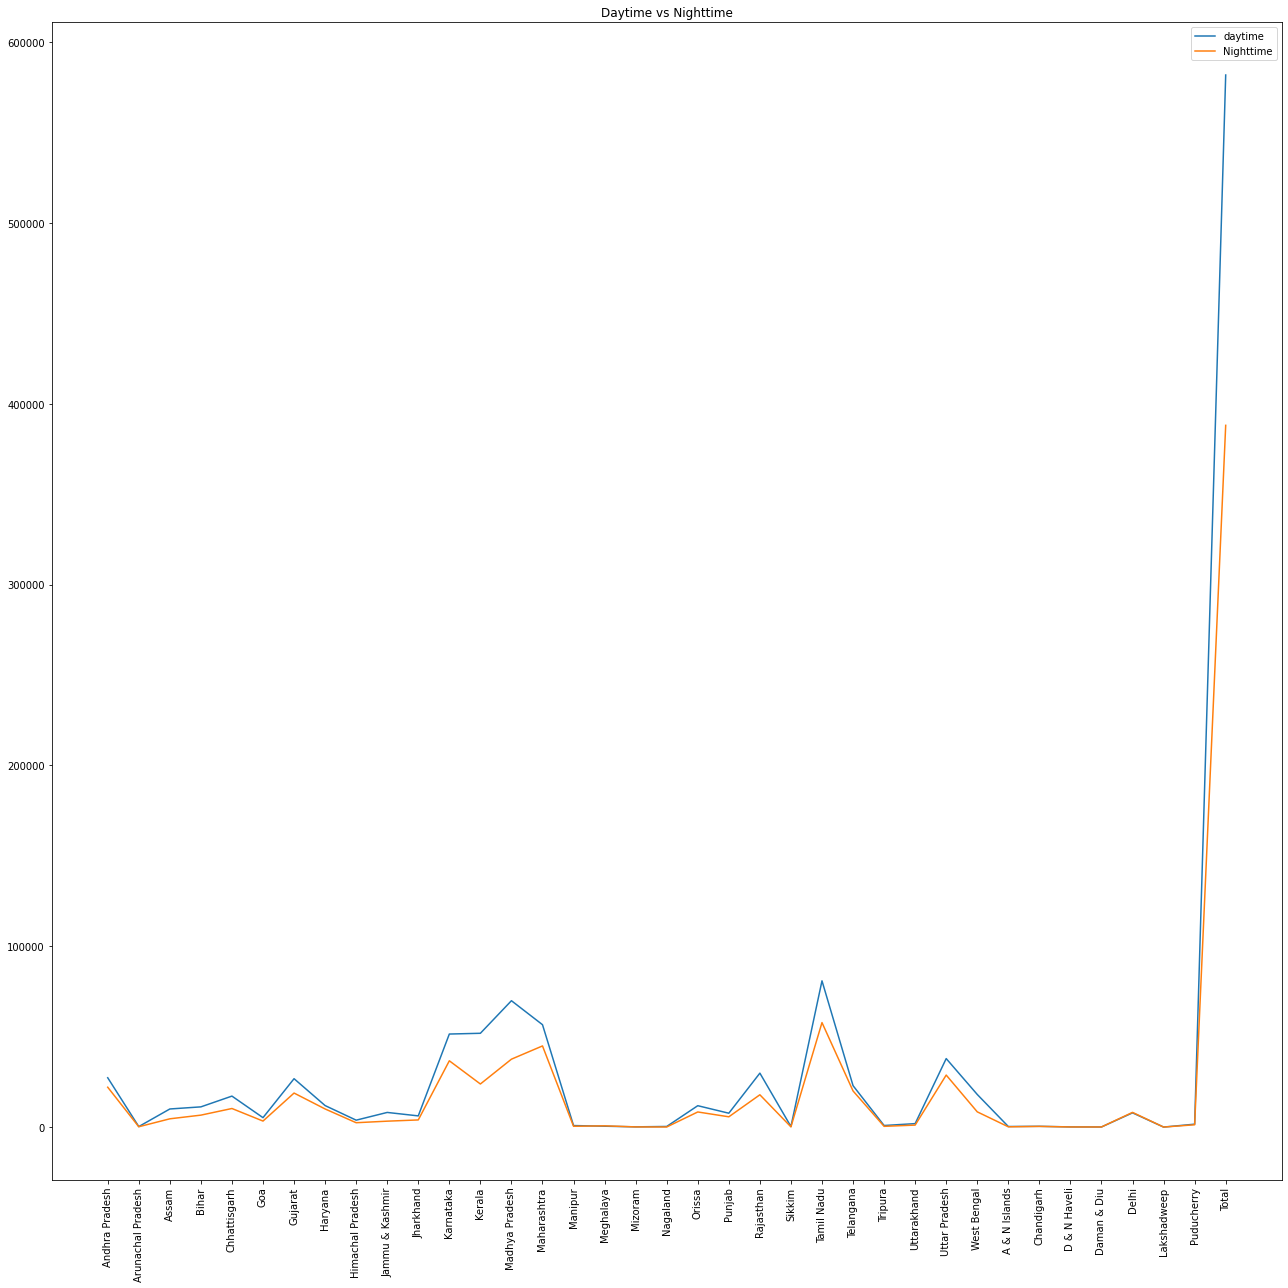

In [74]:
states = np.array(df7['States/Uts'])
#y-axis
a = np.array(df7['daytime'])
b = np.array(df7['Nighttime'])


fig, ax = plt.subplots(figsize=(18,18))
plt.plot(a,label='daytime')
plt.plot(b,label='Nighttime')


#ax.set_xlabel('Year')
ax.set_title('Daytime vs Nighttime')
ax.set_xticks(x,states,rotation=90)
ax.legend()



fig.tight_layout()

plt.show()